# Gun Violence in the U.S.

### DATA 512 Au: Human-Centered Data Science
#### *Sanjana Gupta*

## Table of Contents
- [1. Motivation](#motivation)
- [2. Related Work](#related)
- [3. Data](#data)
- [4. Research Questions](#research)
- [5. Methodology](#methodology)
- [6. Data Pre-Processing](#preprocess)
- [7. Demographic Related Analysis & Findings](#demographic)
    - [7.1. Subjects](#subjects)
    - [7.2. Victims](#victims)
    - [7.3. Top 20 Dangerous Cities to Live In](#top10)
    - [7.4. Incident Categories](#incident-category)
    - [7.5. Census Data](#census)
- [8. Political Party Related Analysis & Findings](#political)
- [9. Gun Laws Related Analysis & Findings](#gun-laws)
    - [9.1. Permits](#permit)
    - [9.2. Purchase Permits](#purchase-permit)
    - [9.3. Registration of Firearms](#registration)
    - [9.4. Open Carry](#open-carry)
    - [9.5. Background Checks](#background)
    - [9.6. Correlation Matrix](#corr)
    - [9.7. Linear Regression](#linear)
    - [9.8. Strict vs Lax Gun Laws](#strict)
- [10. Conclusion](#conclusion)
- [11. Limitations](#limitations)
- [12. Future Work](#future)

<a name="motivation"/>
    
# Motivation

Over 37,500 American lives are lost on an average every year due to gun related violence. Between 1968 to 2011, about 1.4 million people have died from firearms in the United States. This number includes all deaths resulting from a firearm, including suicides, homicides and accidental discharges. The US gun homicide rate is 25 times than that of other high income countries. (!!) 

Given the alarming trend at which homicidal shootings have been increasing, it's important to take a hard look at this problem and, and ultimately make **data-driven** decisions. Unfortunately, research into firearms and gun control is full of difficulties due to limited data on gun ownership and use and aggregation of crime data.

The purpose of this project is to explore this issue and to see if there exists a correlation between gun related crimes and the firearm laws mandated by each state. This project also wishes to explore the different socio-economic and/or demographic factors that lead to higher number of such incidents.

<a name="related"/>

# Related Work

Unfortunately, the Congress has prohibited [CDC](https://www.cdc.gov/violenceprevention/firearms/funded-research.html) from conducting any research on gun violence prevention and there has been no funding alloted for the same since 1996. Gun politics tends to be polarized in the United States between advocates of gun rights (typically conservatives) and those who support stricter gun laws (typically liberals). Since there are no gun laws at the federal level, it's hard to regulate the sale of firearms. Most states guarantee the [right to bear arms](https://constitution.congress.gov/constitution/amendment-2/), but laws vary from county to county as well. These laws are complex and due to lack of funding, there isn't a single source of rich data.

There has been research carried out independently by various organizations that aim to build awareness about this issue. In particular, the [Everytown Support Fund](https://everytownsupportfund.org/) seeks to improve the understanding of the causes of gun violence and help reduce it. This is done by carrying out research, developing evidence based policies, and advancing gun safety and gun violence prevention in communities and courts. The [research](https://everytownresearch.org/research/) carried out by Everytown also lists solutions to deal with prevalent problem - [Stricter Background Checks](https://everytownresearch.org/solution/background-checks/), [Extreme Risk Laws\Red Flags to de-escalate emergency situations](https://everytownresearch.org/solution/extreme-risk-laws/), [Secure and Responsible Gun Storage](https://everytownresearch.org/solution/responsible-gun-storage/), [Enforcing a Waiting Period](https://everytownresearch.org/solution/waiting-periods/) among a few.

Another interesting study carried out by the [American Psychological Association](https://www.apa.org/pubs/info/reports/gun-violence-prevention) aims to predict gun violence based on socio-economic and demographic information to identify at risk individuals, and preventing it at an individual level as well as at a community level.

<a name="data"/>

# Data

### Gun Violence Data

The primary dataset that will be used for analysis is the [Gun Violence Data](https://www.kaggle.com/jameslko/gun-violence-data) hosted on Kaggle. It is a comprehensive record of over 260K gun violence related incidents in the United States from 2013-2018. This data was web scraped from [Gun Violence Archive](https://www.gunviolencearchive.org/), a not-for-profit corporation that collects gun violence related incidents from over 7,500 law enforcement, media, government, and commercial sources daily.

It contains 239, 677 rows of data with 29 columns/features. The dataset consists of:
* Date of incident
* The location (City, State, Address, Latitude, Longitude, Congressional District, State House District, State Senate District)
* Casualties (Killed, Injured)
* Logistics (Guns stolen, Number of guns involved, Gun type)
* Demographic information about the persons involved (Age, Gender, Type)

The Gun Violence Data is publicly available and as [stated](https://www.gunviolencearchive.org/about), it can be used for research, advocacy or writing. 

This dataset contains a lot of missing data from 2013 and only contains data until March 2018. There have been a considerable number of incidents since then that are not included in the dataset.

Since the entire dataset could not be uploaded to GitHub due to size restrictions, a subset of the dataset can be found [here](https://github.com/sanjanagupta16/data-512-final/blob/main/data/gun-violence_sample.csv).

### Census Data 

To normalize the number of incidents per state, The [US Census Population Data](https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/state/asrh/scprc-est2017-18+pop-res.csv) will be used.

The datset can be found [here](https://github.com/sanjanagupta16/data-512-final/blob/main/data/census_population.csv).

### Political Party Affiliation

Data was collected for each state's political party affiliation - Democratic or Republican. For this, results for the  US Presidential Elections was considered. Since elections are held every 4 years only, data for 2012 and 2016 was collected for each state, and extended for the remaining years. 

The data was collected from [MIT Election Data + Science Lab](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX).

The dataset collected can be found [here](https://github.com/sanjanagupta16/data-512-final/blob/main/data/political_party_affiliation.csv).

### Gun Laws

Since gun laws differ for each state (and sometimes across counties as well), and a single, rich source of data could not be found, data was curated for each state. This was done by looking up the state gun laws [here](https://www.gunstocarry.com/gun-laws-state/). Each state was also assigned a star rating from 1 to 5, with 5 being awarded to states with the friendliest gun laws. 

For the purpose of this project, gun laws applicable only to handguns was considered. 

The data curated can be found [here](https://github.com/sanjanagupta16/data-512-final/blob/main/data/gun_laws.csv).

<a name="research"/>

# Research Questions

This project aims to answer the following research questions:

- Is there a correlation between the use of guns and demographics of the users involved? 
- Is there a statistical significance in gun related crimes between red and blue states?
- Is the gun ownership rate on a state level associated with lower rates of any kind of crime?

<a name="methodology"/>

# Methodology

For data cleaning and pre-processing, [pandas](https://pandas.pydata.org/) and [numpy](https://numpy.org/) python libraries were used.

To answer the first question, a combination of Exploratory Data Analysis was carried out.

For EDA, [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) python libraries were used.

For the second and third research question, a combination of Exploratory Data Analysis and Linear Regression were carried out.

<a name="preprocess"/>

# Data Pre-Processing 

### Importing all libraries required:

In [1]:
import numpy as np
import pandas as pd
import pprint
import matplotlib
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

### Reading the Gun Violence Data:

In [2]:
data = pd.read_csv('data/gun-violence-data_01-2013_03-2018.csv')
# data = pd.read_csv('data/gun-violence_sample.csv')

In [3]:
data_sample = data.sample(frac =.20)
data_sample.to_csv('data/gun-violence_sample.csv')

### Taking a look at the raw data:

In [4]:
data.head(2)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0


### Taking a look at the number of records of data, and the number of columns:

In [5]:
data.shape

(239677, 29)

### Summary Statistics:

In [6]:
data.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


### Taking a look at the data types for each column:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

### Data Cleaning

**Dropping _participant_name_ column to protect identity of people involved as well as other unnecessary columns:**

In [8]:
# Dropping unnecessary columns

data.drop(['incident_url', 'source_url', 'congressional_district', 'state_house_district', 
           'state_senate_district', 'sources', 'incident_id', 'incident_url_fields_missing',
          'participant_name', 'notes', 'latitude', 'longitude'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   date                      239677 non-null  object 
 1   state                     239677 non-null  object 
 2   city_or_county            239677 non-null  object 
 3   address                   223180 non-null  object 
 4   n_killed                  239677 non-null  int64  
 5   n_injured                 239677 non-null  int64  
 6   gun_stolen                140179 non-null  object 
 7   gun_type                  140226 non-null  object 
 8   incident_characteristics  239351 non-null  object 
 9   location_description      42089 non-null   object 
 10  n_guns_involved           140226 non-null  float64
 11  participant_age           147379 non-null  object 
 12  participant_age_group     197558 non-null  object 
 13  participant_gender        203315 non-null  o

### Checking for Missing Data

In [9]:
data.isnull().sum()

date                             0
state                            0
city_or_county                   0
address                      16497
n_killed                         0
n_injured                        0
gun_stolen                   99498
gun_type                     99451
incident_characteristics       326
location_description        197588
n_guns_involved              99451
participant_age              92298
participant_age_group        42119
participant_gender           36362
participant_relationship    223903
participant_status           27626
participant_type             24863
dtype: int64

**There is considerable data that is missing. To tackle this, all missing data will be replaced with the value "Unknown".**

In [10]:
# Filling NA with "Unknown"

data.fillna("Unknown", inplace=True)

#### Participant Types:

In [11]:
data['participant_type'].value_counts().head(15)

0::Victim                                                                                    58564
0::Victim||1::Subject-Suspect                                                                50579
0::Subject-Suspect                                                                           44914
Unknown                                                                                      24863
0::Victim||1::Subject-Suspect||2::Subject-Suspect                                            10941
0::Victim||1::Victim                                                                          9033
0::Subject-Suspect||1::Subject-Suspect                                                        8922
0::Victim||1::Victim||2::Subject-Suspect                                                      6552
0::Victim||1::Subject-Suspect||2::Subject-Suspect||3::Subject-Suspect                         3720
0::Subject-Suspect||1::Subject-Suspect||2::Subject-Suspect                                    3040
0::Victim|

#### Renaming Columns
(To make them for readable)

In [12]:
clean_data = data.rename(columns={
    'date': 'Year',
    'state': 'State Name',
    'city_or_county' : 'City/County',
    'n_killed': 'Number of Killed',
    'n_injured': 'Number of Injured',
    'incident_characteristics': 'Incident Info',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'participant_age': 'Participant Age',
    'participant_age_group': 'Participant Age Group',
    'participant_gender': 'Participant Gender',
    'participant_relationship': 'Participant Relationship',
    'participant_status': 'Participant Status',
    'participant_type': 'Participant Type',
    'gun_stolen' : 'Gun Stolen',
    'gun_type' : 'Gun Type',
    'n_guns_involved' : 'Number of Guns Involved',
    'location_description' : 'Location Description'
})

clean_data.head(1)

,Year,State Name,City/County,address,Number of Killed,Number of Injured,Gun Stolen,Gun Type,Incident Info,Location Description,Number of Guns Involved,Participant Age,Participant Age Group,Participant Gender,Participant Relationship,Participant Status,Participant Type
0,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,Unknown,Unknown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,Unknown,Unknown,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...


#### Changing Data Type:

**This is done for the Year columnm, since the incident date isn't required for analysis, only the year is required**

In [13]:
clean_data.loc[:,'Year'] = clean_data.loc[:,'Year'].apply(lambda x: int(x[:4]))
clean_data.head(1)

,Year,State Name,City/County,address,Number of Killed,Number of Injured,Gun Stolen,Gun Type,Incident Info,Location Description,Number of Guns Involved,Participant Age,Participant Age Group,Participant Gender,Participant Relationship,Participant Status,Participant Type
0,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,Unknown,Unknown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,Unknown,Unknown,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...


<a name="demographic">

# Demographic Related Analysis & Findings

#### Looking at Participant's Age:

In [14]:
clean_data['Participant Age'].value_counts()

Unknown                              92298
0::24                                 3814
0::23                                 3735
0::22                                 3733
0::19                                 3719
                                     ...  
0::25||1::21||2::24||3::23||4::23        1
0::36||1::31||2::44||3::40               1
0::64||1::57                             1
1::34||2::50                             1
0::27||1::15||2::21||3::22               1
Name: Participant Age, Length: 18952, dtype: int64

In [15]:
clean_data.head(1)

,Year,State Name,City/County,address,Number of Killed,Number of Injured,Gun Stolen,Gun Type,Incident Info,Location Description,Number of Guns Involved,Participant Age,Participant Age Group,Participant Gender,Participant Relationship,Participant Status,Participant Type
0,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,Unknown,Unknown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,Unknown,Unknown,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...


**The data is split on || operator for the following columns:**
- Participant Age
- Participant Age Group
- Participant Type
- Participant Status

**Writing a function to convert this data into a more usable format for analysis:**

In [16]:
def split_value(value: str) -> dict:
    '''
    Converts string value that looks like 'key_0::value_0||key_1:value_1'
    into a dictionary { 'key_0': 'value_0', 'key_1': 'value1' }
    '''
    result = {}
    if not(value):
        return result
    items = value.split('||')
    for item in items:
        key_value = item.split('::')
        if len(key_value) > 1:
            result[key_value[0]] = key_value[1]
    return result

In [17]:
new_data = {
    'Age Group': [],
    'Type': [],
    'Year': [],
    'State Name': []
}
for i,row in clean_data.iterrows():
    age_groups = split_value(row['Participant Age Group'])
    types = split_value(row['Participant Type'])
    statuses = split_value(row['Participant Status'])
    for participant_index in age_groups:
        age_group = age_groups[participant_index]
        part_type = types[participant_index]
        new_data['Age Group'].append(age_group)
        new_data['Type'].append(part_type)
        new_data['Year'].append(row['Year'])
        new_data['State Name'].append(row['State Name'])
new_data = pd.DataFrame(new_data)

new_data.head(2)

,Age Group,Type,Year,State Name
0,Adult 18+,Victim,2013,Pennsylvania
1,Adult 18+,Victim,2013,Pennsylvania


#### Taking a look at  age group:

Adult 18+     300616
Teen 12-17     25193
Child 0-11      4472
Name: Age Group, dtype: int64


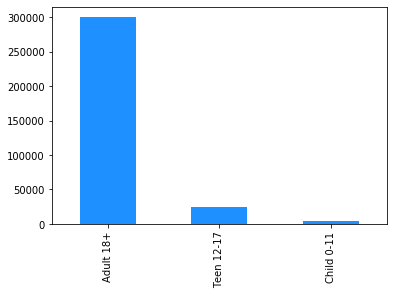

In [18]:
print(new_data['Age Group'].value_counts())

new_data['Age Group'].value_counts().plot(kind='bar', color='dodgerblue')
plt.show()

**Most incidents involve adults, but there is a large number of incidents that involve teenagers.**

<a name="subjects"/>

### Taking a look at subjects involved:

In [19]:
suspect_age_groups = new_data.loc[new_data["Type"] == "Subject-Suspect"]
adult_suspect_age_groups = suspect_age_groups.loc[new_data["Age Group"] == "Adult 18+"]
adult_suspect_count = adult_suspect_age_groups['State Name'].value_counts()
teen_suspect_age_groups = suspect_age_groups.loc[new_data["Age Group"] == "Teen 12-17"]
teen_suspect_count = teen_suspect_age_groups['State Name'].value_counts()
child_suspect_age_groups = suspect_age_groups.loc[new_data["Age Group"] == "Child 0-11"]
child_suspect_count = child_suspect_age_groups['State Name'].value_counts()

suspect_df = pd.DataFrame({"Adult 18+ Shooters":adult_suspect_count,
                "Teen 12-17 Shooters":teen_suspect_count,
                  "Child 0-11 Shooters":child_suspect_count})

suspect_df.fillna(0, inplace=True)
suspect_df['Child 0-11 Shooters'] = suspect_df['Child 0-11 Shooters'].astype(int)
suspect_df = suspect_df.reset_index()

suspect_df = suspect_df.rename(columns={'index':'State'}).sort_values('Adult 18+ Shooters').reset_index(drop = True)
suspect_df.head(5)

,State,Adult 18+ Shooters,Teen 12-17 Shooters,Child 0-11 Shooters
0,Wyoming,176,4,1
1,Hawaii,263,7,0
2,Vermont,377,12,1
3,South Dakota,383,46,1
4,North Dakota,418,12,2


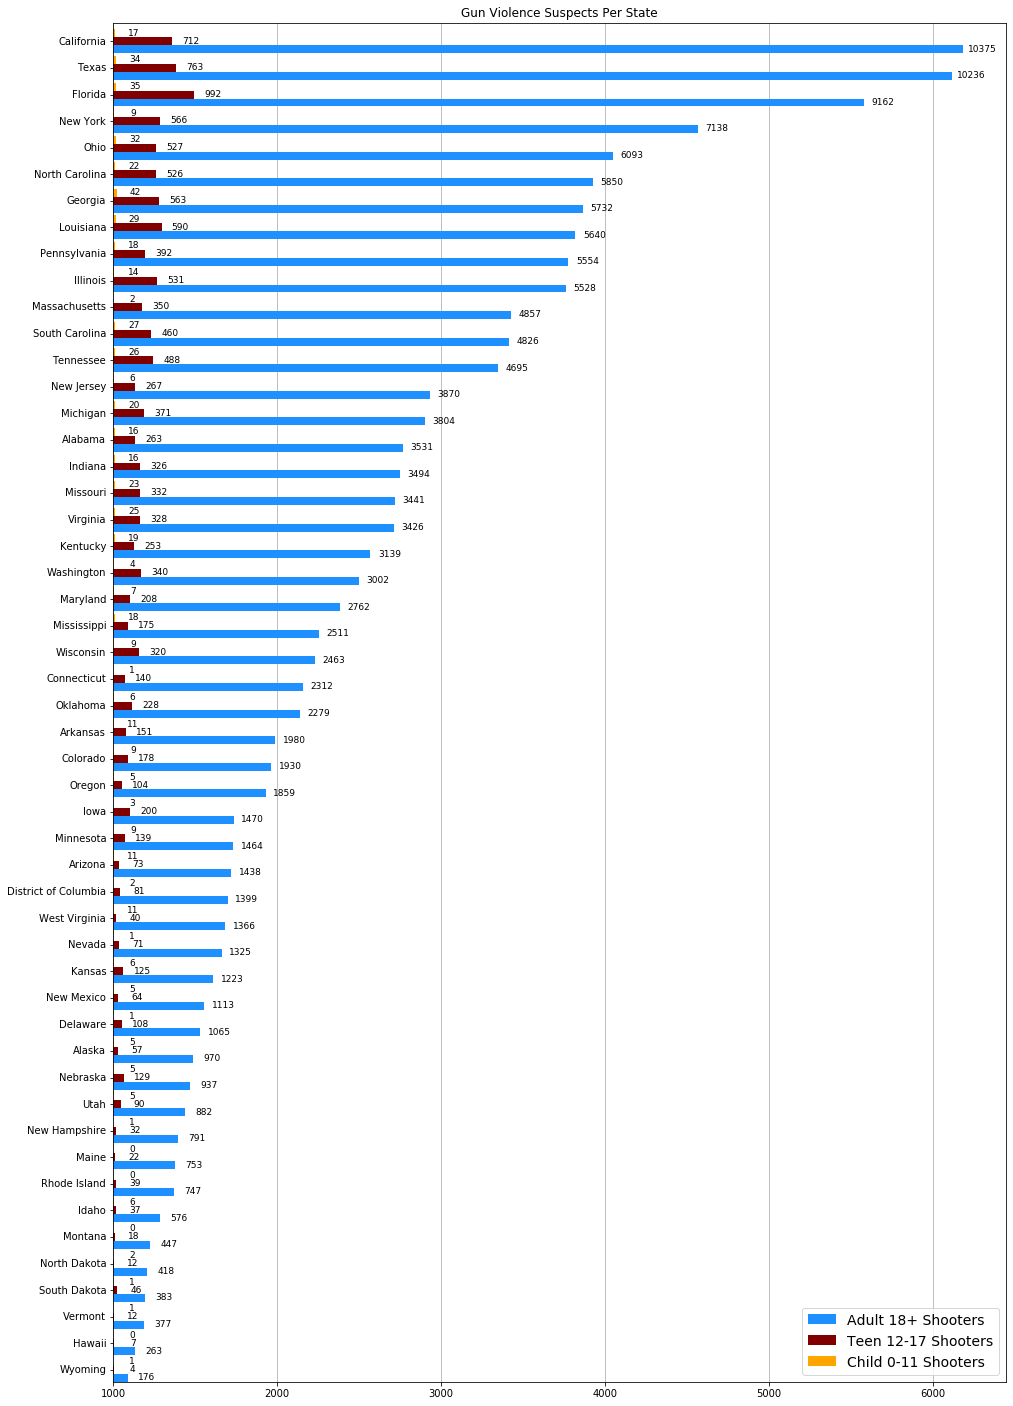

In [20]:
fig,ax = plt.subplots(figsize=(16,25))
bar_width = 0.3
num_adult = ax.barh(suspect_df.index, suspect_df['Adult 18+ Shooters'], bar_width, color='dodgerblue')
num_teen = ax.barh(suspect_df.index + bar_width, suspect_df['Teen 12-17 Shooters'], bar_width, color='maroon')
num_child = ax.barh(suspect_df.index + bar_width * 2, suspect_df['Child 0-11 Shooters'], bar_width, color='orange')
ax.set_title('Gun Violence Suspects Per State')
ax.set_yticks(suspect_df.index + bar_width)
ax.set_yticklabels(suspect_df['State'], wrap=True, ma='left',va='center')
ax.set_xticklabels([1000 * i for i in range(1,12)])
ax.set_ylim(-0.15, 51)
ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.legend([num_adult, num_teen, num_child],['Adult 18+ Shooters', 'Teen 12-17 Shooters', 'Child 0-11 Shooters'], fontsize=14)

title_font = {'fontname':'Arial', 'size':20, 'color':'black', 'weight':'semibold' }              
axis_font = {'fontname':'Arial', 'size':16}
legend_font = {'size' : 15 }
ticks_fontsize = 14
marker_size = 14
fig_size = (16, 10)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text(width + 230, rect.get_y() ,
                '%d' % int(width),
                ha='center', va='bottom', fontsize=9)

autolabel(num_adult)
autolabel(num_teen)
autolabel(num_child)

fig.savefig('output/Suspects_Per_State.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

<a name="victims"/>

### Looking at victims involved:

In [21]:
vic_age_groups = new_data.loc[new_data["Type"] == "Victim"]
adult_vic_age_groups = vic_age_groups.loc[new_data["Age Group"] == "Adult 18+"]
adult_vic_count = adult_vic_age_groups['State Name'].value_counts()
teen_vic_age_groups = vic_age_groups.loc[new_data["Age Group"] == "Teen 12-17"]
teen_vic_count = teen_vic_age_groups['State Name'].value_counts()
child_vic_age_groups = vic_age_groups.loc[new_data["Age Group"] == "Child 0-11"]
child_vic_count = child_vic_age_groups['State Name'].value_counts()

vic_df = pd.DataFrame({"Adult 18+ Victims":adult_vic_count,
                "Teen 12-17 Victims":teen_vic_count,
                  "Child 0-11 Victims":child_vic_count})

vic_df.fillna(0, inplace=True)
vic_df['Child 0-11 Victims'] = vic_df['Child 0-11 Victims'].astype(int)
vic_df = vic_df.reset_index()

vic_df = vic_df.rename(columns={'index':'State'}).sort_values('Adult 18+ Victims').reset_index(drop = True)
vic_df.head(5)

,State,Adult 18+ Victims,Teen 12-17 Victims,Child 0-11 Victims
0,Wyoming,87,1,5
1,South Dakota,128,17,9
2,Hawaii,142,15,2
3,North Dakota,155,10,6
4,Vermont,181,4,5


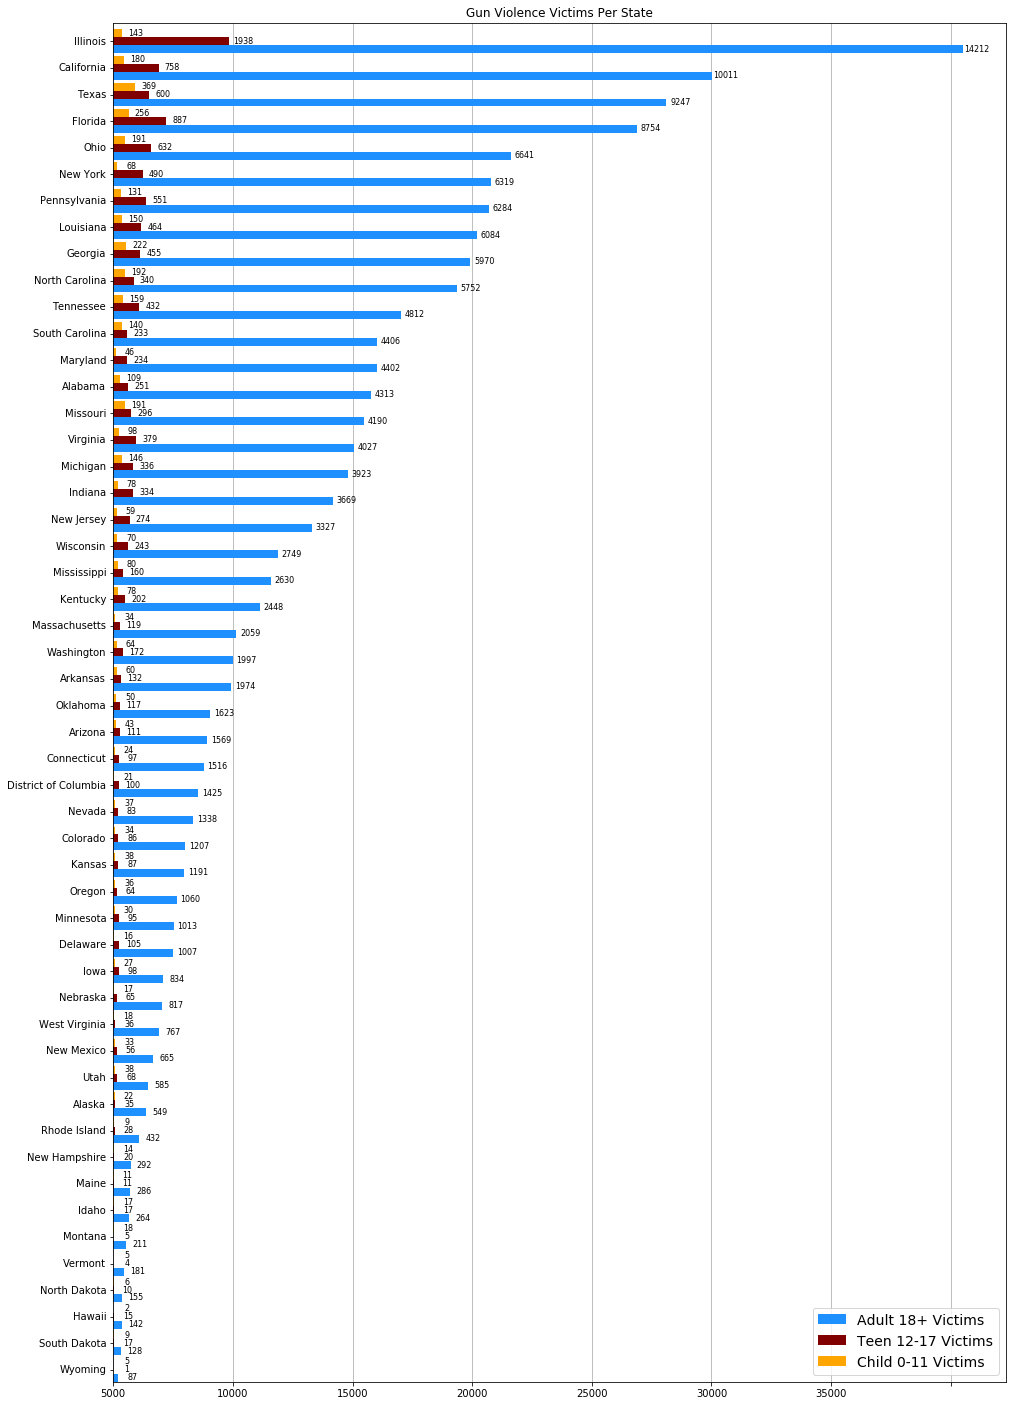

In [22]:
fig,ax = plt.subplots(figsize=(16,25))
bar_width = 0.3
num_adult = ax.barh(vic_df.index, vic_df['Adult 18+ Victims'], bar_width, color='dodgerblue')
num_teen = ax.barh(vic_df.index + bar_width, vic_df['Teen 12-17 Victims'], bar_width, color='maroon')
num_child = ax.barh(vic_df.index + bar_width * 2, vic_df['Child 0-11 Victims'], bar_width, color='orange')
ax.set_title('Gun Violence Victims Per State')
ax.set_yticks(vic_df.index + bar_width)
ax.set_yticklabels(vic_df['State'], wrap=True, ma='left',va='center')
ax.set_xticklabels([5000 * i for i in range(1,8)])
ax.set_ylim(-0.15, 51)
ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.legend([num_adult, num_teen, num_child],['Adult 18+ Victims', 'Teen 12-17 Victims', 'Child 0-11 Victims'], 
          fontsize=14)

title_font = {'fontname':'Arial', 'size':20, 'color':'black', 'weight':'semibold' }              
axis_font = {'fontname':'Arial', 'size':16}
legend_font = {'size' : 15 }
ticks_fontsize = 14
marker_size = 14
fig_size = (16, 10)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        ax.text(width + 230, rect.get_y() ,
                '%d' % int(width),
                ha='center', va='bottom', fontsize=8)

autolabel(num_adult)
autolabel(num_teen)
autolabel(num_child)

fig.savefig('output/Victims_Per_State.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

<write analysis>

#### Total Incidents Per State

In [23]:
state_groups = clean_data.groupby('State Name')
state_data = pd.concat([
    state_groups['State Name'].count().rename('Number of Incidents'),
    state_groups['Number of Killed'].sum().rename('Number of Killed'),
    state_groups['Number of Injured'].sum().rename('Number of Injured')], 
    axis=1).sort_values('Number of Incidents', ascending=True).reset_index()
state_data.head()

,State Name,Number of Incidents,Number of Killed,Number of Injured
0,Hawaii,289,63,85
1,Vermont,472,57,73
2,Wyoming,494,73,52
3,South Dakota,544,90,114
4,North Dakota,573,69,130


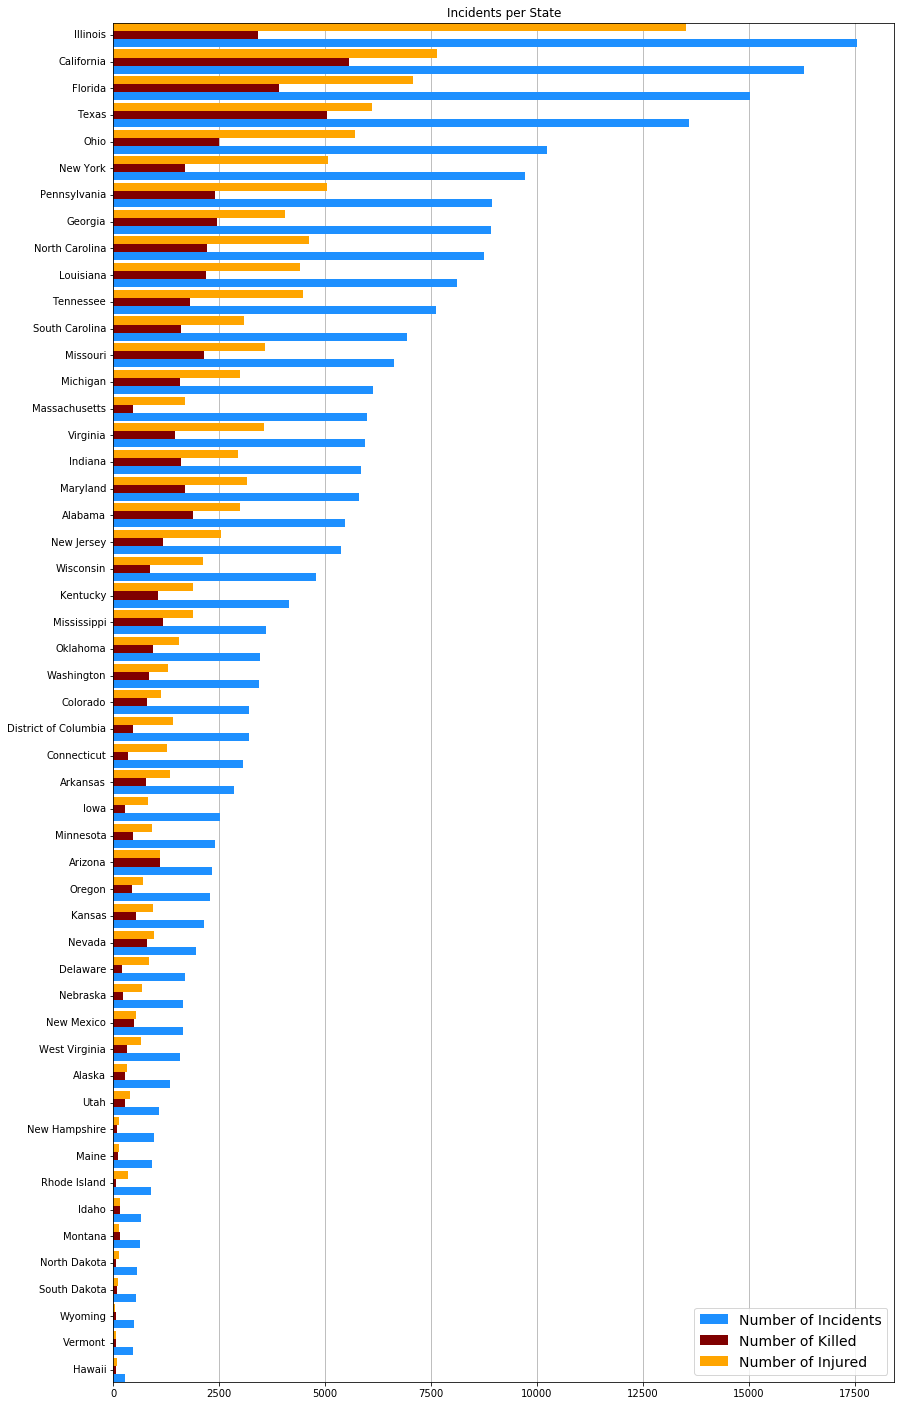

In [24]:
bar_width = 0.3
fig,ax = plt.subplots(figsize=(14,25))
n_inc = ax.barh(state_data.index, state_data['Number of Incidents'], bar_width, color='dodgerblue')
n_kil = ax.barh(state_data.index + bar_width, state_data['Number of Killed'], bar_width, color='maroon')
n_inj = ax.barh(state_data.index + 2 * bar_width, state_data['Number of Injured'], bar_width, color='orange')
ax.set_title('Incidents per State')
ax.set_yticks(state_data.index + bar_width)
ax.set_yticklabels(state_data['State Name'], va='center')
ax.set_xticklabels([2500 * i for i in range(0,8)])
ax.set_ylim(-0.15, 50.75)
ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.legend([n_inc, n_kil, n_inj],['Number of Incidents', 'Number of Killed', 'Number of Injured'], fontsize=14)
fig.savefig('output/Incidents per State.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

<a name="top10"/>

### Top 20 Dangerous Cities to Live in:

In [25]:
city_groups = clean_data.groupby(['State Name','City/County'])
city_data = pd.concat([
    city_groups['State Name'].count().rename('Number of Incidents'),
    city_groups['Number of Killed'].sum().rename('Number of Killed'),
    city_groups['Number of Injured'].sum().rename('Number of Injured')], axis=1).sort_values('Number of Incidents', ascending=True).reset_index()
city_data['City'] = city_data['City/County'] + ', ' + city_data['State Name']
city_data = city_data.drop(columns=['State Name', 'City/County']).loc[:,['City', 'Number of Incidents', 'Number of Killed', 'Number of Injured']]
city_data = city_data.sort_values('Number of Incidents', ascending=False)
city_data.head(20)

,City,Number of Incidents,Number of Killed,Number of Injured
17540,"Chicago, Illinois",10814,2104,10427
17539,"Baltimore, Maryland",3943,1055,2427
17538,"Washington, District of Columbia",3189,445,1411
17537,"New Orleans, Louisiana",3070,703,1892
17536,"Philadelphia, Pennsylvania",2929,890,2318
17535,"Saint Louis, Missouri",2498,916,1782
17534,"Milwaukee, Wisconsin",2487,486,1570
17533,"Houston, Texas",2480,1144,1245
17532,"Memphis, Tennessee",2384,622,1690
17531,"Jacksonville, Florida",2317,421,1126


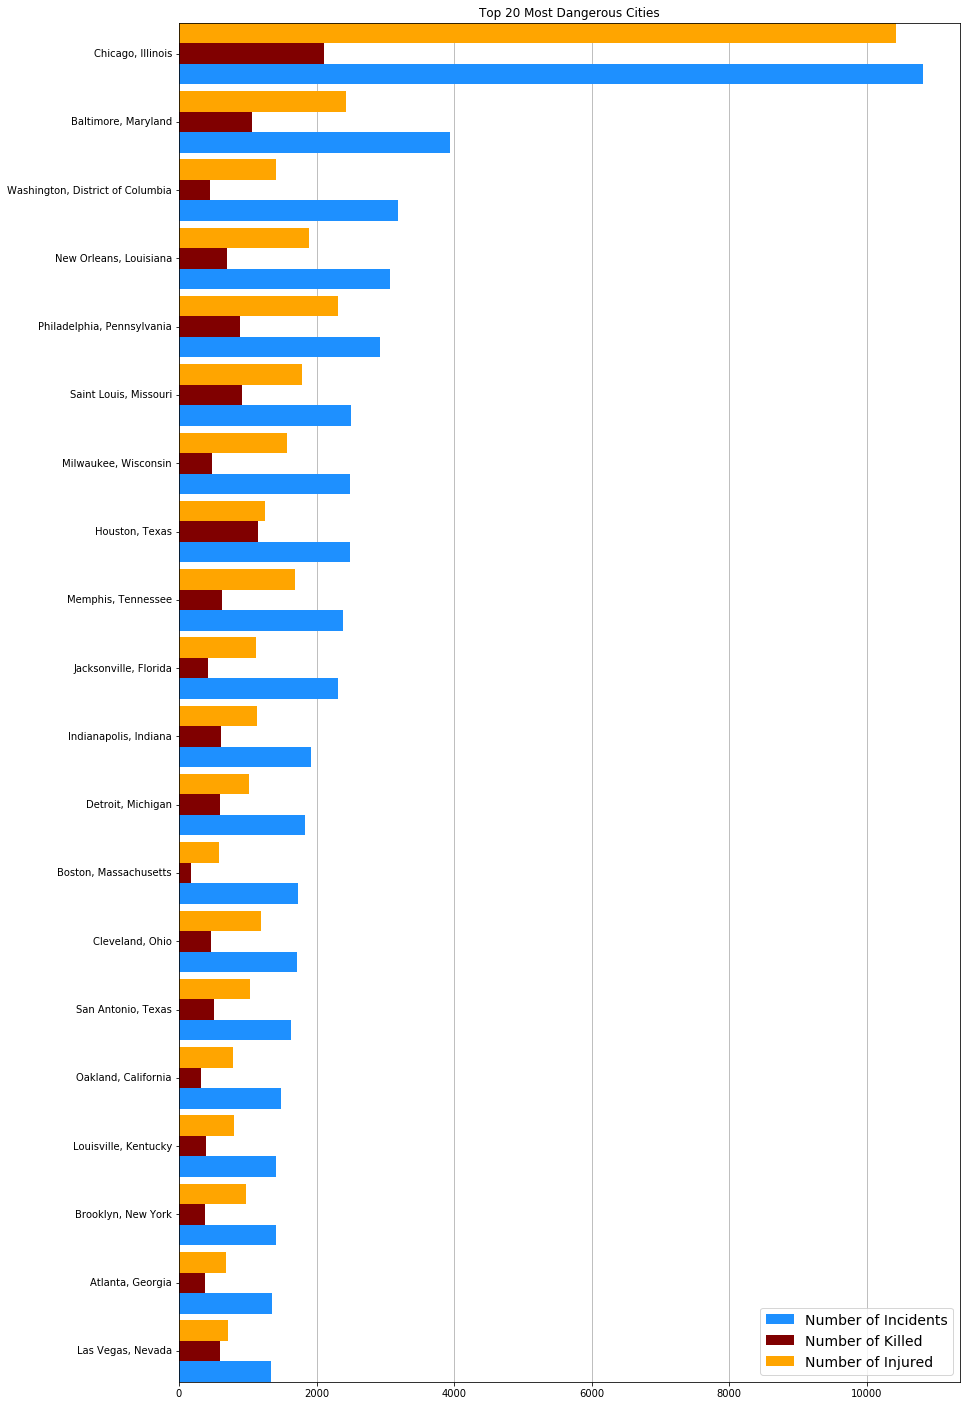

In [26]:
bar_width = 0.3
top_city_data = city_data.head(20).sort_values('Number of Incidents').reset_index(drop=True)
fig,ax = plt.subplots(figsize=(14,25))
n_inc = ax.barh(top_city_data.index, top_city_data['Number of Incidents'], bar_width, color='dodgerblue')
n_kil = ax.barh(top_city_data.index + bar_width, top_city_data['Number of Killed'], bar_width, color='maroon')
n_inj = ax.barh(top_city_data.index + 2 * bar_width, top_city_data['Number of Injured'], bar_width, color='orange')
ax.set_title('Top 20 Most Dangerous Cities')
ax.set_yticks(top_city_data.index + bar_width)
ax.set_yticklabels(top_city_data['City'], va='center')
ax.set_xticklabels([2000 * i for i in range(0,7)])
ax.set_ylim(-0.15, 19.75)
ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.legend([n_inc, n_kil, n_inj],['Number of Incidents', 'Number of Killed', 'Number of Injured'], fontsize=14)
fig.savefig('output/Top 10 Most Dangerous Cities.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

<a name="incident-category"/>

### Incident Categories

In [27]:
empty_value_set = {''}
split_inc_info_data = clean_data.copy()
split_inc_info_data['Incident Info'] = split_inc_info_data['Incident Info'].apply(lambda x: set(x.split('|')).difference(empty_value_set))
split_inc_info_data.head(2)

,Year,State Name,City/County,address,Number of Killed,Number of Injured,Gun Stolen,Gun Type,Incident Info,Location Description,Number of Guns Involved,Participant Age,Participant Age Group,Participant Gender,Participant Relationship,Participant Status,Participant Type
0,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,Unknown,Unknown,{Possession (gun(s) found during commission of...,Unknown,Unknown,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,2013,California,Hawthorne,13500 block of Cerise Avenue,1,3,Unknown,Unknown,"{Shot - Wounded/Injured, Gang involvement, Mas...",Unknown,Unknown,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,Unknown,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...


#### Taking a look at all the existing incident categories:

In [28]:
distinct_categories = reduce(lambda x,y: x.union(y), split_inc_info_data['Incident Info'])
print(f'There are {len(distinct_categories)} unique categories')
#type(distinct_categories)

There are 110 unique categories


#### Taking a look at the statistics (number of killed, number of injured) for each category:

In [29]:
category_related_data = {
    'Category': [],
    'Number of Incidents': [],
    'Number of Killed': [],
    'Number of Injured': []
}
for category in distinct_categories:
    category_related_data['Category'].append(category)
    filter_series = split_inc_info_data['Incident Info'].apply(lambda x: category in x)
    category_related_incidents = split_inc_info_data.loc[filter_series]
    category_related_data['Number of Incidents'].append(len(category_related_incidents.index))
    category_related_data['Number of Killed'].append(category_related_incidents['Number of Killed'].sum())
    category_related_data['Number of Injured'].append(category_related_incidents['Number of Injured'].sum())

category_data = pd.DataFrame(category_related_data).sort_values('Number of Incidents', ascending=False).reset_index(drop=True)
category_data.head()

,Category,Number of Incidents,Number of Killed,Number of Injured
0,Shot - Wounded/Injured,93926,9958,113987
1,"Shot - Dead (murder, accidental, suicide)",53409,59794,12147
2,Non-Shooting Incident,44837,19,1887
3,Shots Fired - No Injuries,35750,192,985
4,Possession (gun(s) found during commission of ...,30863,2232,5822


#### Dropping some generic categories:

In [30]:
non_gen_category_data = category_data.iloc[4:].reset_index(drop=True)
non_gen_category_data.head()

,Category,Number of Incidents,Number of Killed,Number of Injured
0,Possession (gun(s) found during commission of ...,30863,2232,5822
1,Armed robbery with injury/death and/or evidenc...,19723,3011,9061
2,Brandishing/flourishing/open carry/lost/found,19017,1502,3089
3,ATF/LE Confiscation/Raid/Arrest,17991,602,1275
4,Officer Involved Incident,17988,6509,6490


#### Top 20 Incident Categories

In [31]:
def multiliner(long_str):
    lines = []
    line = ''
    words = long_str.split()
    for word in words:
        line = f'{line} {word}' if line else f'{line}{word}'
        if len(line) > 30:
            lines.append(line)
            line = ''
    if line:
        lines.append(line)
    return '\n'.join(lines)

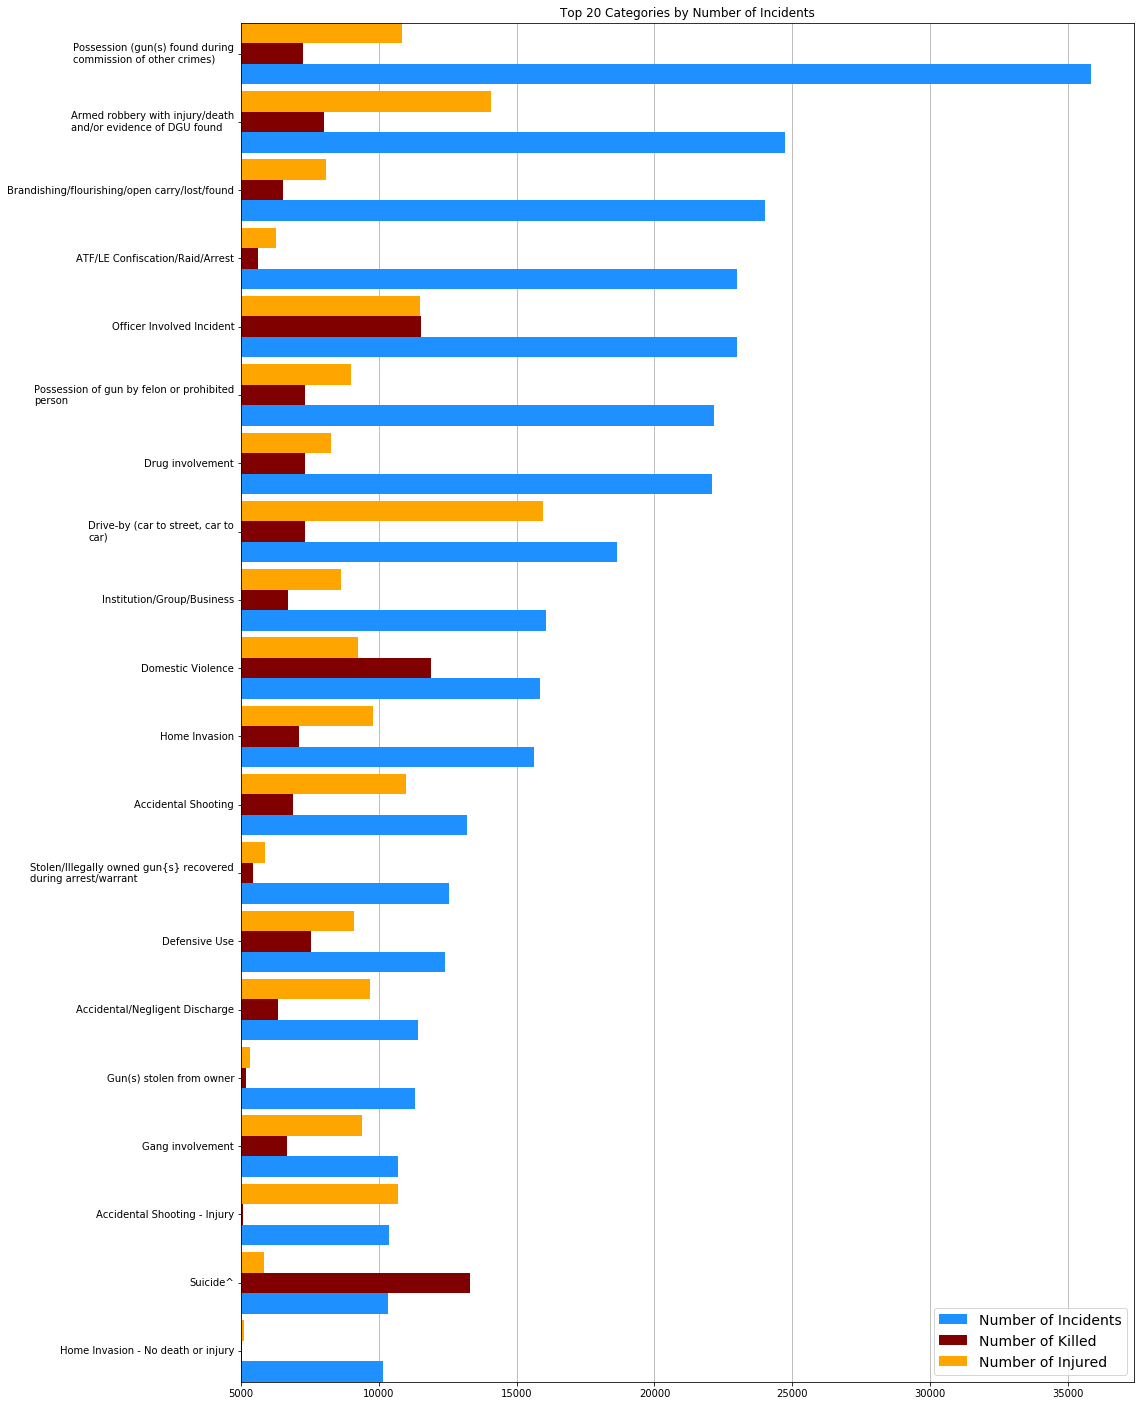

In [32]:
top_n_inc_data = non_gen_category_data.head(20).iloc[::-1].reset_index(drop=True)
bar_width = 0.3
fig,ax = plt.subplots(figsize=(16,25))
n_inc = ax.barh(top_n_inc_data.index, top_n_inc_data['Number of Incidents'], bar_width, color='dodgerblue')
n_kil = ax.barh(top_n_inc_data.index + bar_width, top_n_inc_data['Number of Killed'], bar_width, color='maroon')
n_inj = ax.barh(top_n_inc_data.index + 2 * bar_width, top_n_inc_data['Number of Injured'], bar_width, color='orange')
ax.set_title('Top 20 Categories by Number of Incidents')
ax.set_yticks(top_n_inc_data.index + bar_width)
ax.set_yticklabels(top_n_inc_data['Category'].apply(multiliner), wrap=True, ma='left',va='center')
ax.set_xticklabels([5000 * i for i in range(1,8)])
ax.set_ylim(-0.15, 19.75)
ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.legend([n_inc, n_kil, n_inj],['Number of Incidents', 'Number of Killed', 'Number of Injured'], fontsize=14)
fig.savefig('output/Top 20 Categories by Number of Incidents.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

#### Top 20 Incident Categories by Number of Killed

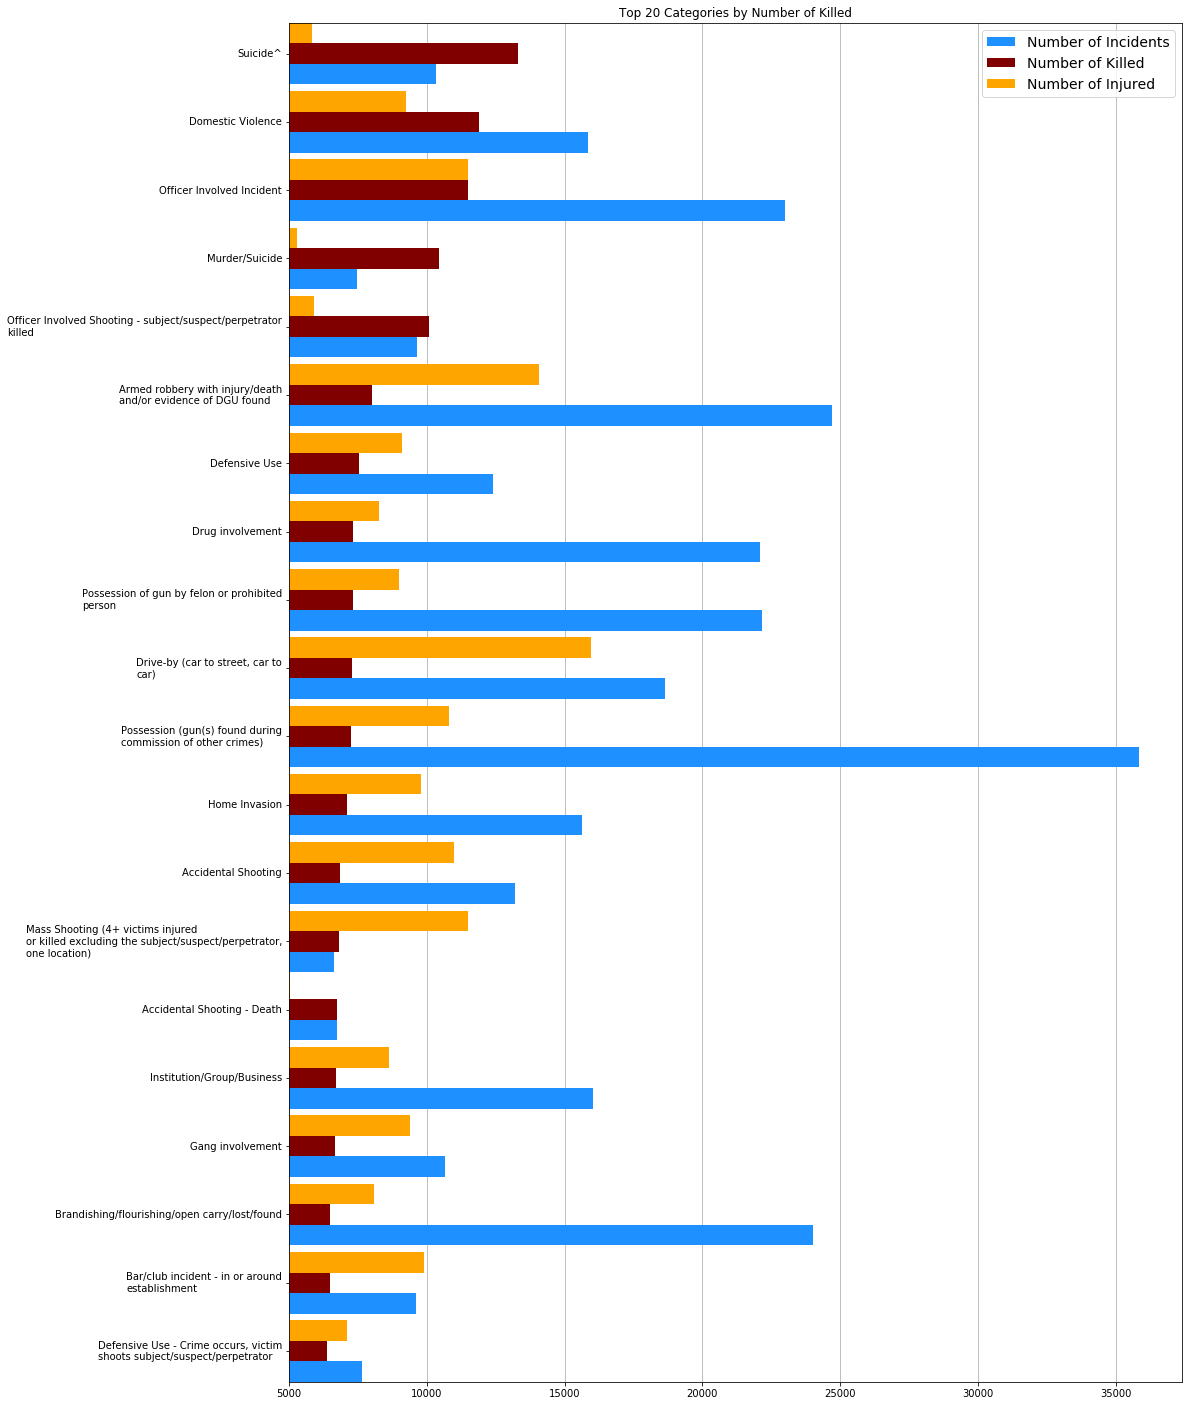

In [33]:
top_n_kil_data = non_gen_category_data.sort_values('Number of Killed', ascending=False).head(20).iloc[::-1].reset_index(drop=True)
bar_width = 0.3
fig,ax = plt.subplots(figsize=(16,25))
n_inc = ax.barh(top_n_kil_data.index, top_n_kil_data['Number of Incidents'], bar_width, color='dodgerblue')
n_kil = ax.barh(top_n_kil_data.index + bar_width, top_n_kil_data['Number of Killed'], bar_width, color='maroon')
n_inj = ax.barh(top_n_kil_data.index + 2 * bar_width, top_n_kil_data['Number of Injured'], bar_width, color='orange')
ax.set_title('Top 20 Categories by Number of Killed')
ax.set_yticks(top_n_kil_data.index + bar_width)
ax.set_yticklabels(top_n_kil_data['Category'].apply(multiliner), wrap=True, ma='left',va='center')
ax.set_xticklabels([5000 * i for i in range(1,8)])
ax.set_ylim(-0.15, 19.75)
ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.legend([n_inc, n_kil, n_inj],['Number of Incidents', 'Number of Killed', 'Number of Injured'], fontsize=14)
fig.savefig('output/Top 20 Categories by Number of Killed.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

#### Creating Meta Categories

Since there are too many incident categories present in the data, the following block of code groups certain incident categories together to analyze incidents at a broader level.

In [34]:
accidental_shooting = {
    'Accidental Use',
    'Accidental Shooting',
    'Accidental Shooting - Death',
    'Accidental Shooting - Injury',
    'Accidental Shooting at a Business',
    'Accidental/Negligent Discharge',
    'Thought gun was unloaded',
    'Self-Inflicted (not suicide or suicide attempt - NO PERP)',
    'Playing with gun',
    'Cleaning gun'}

misc = {
    'Not Interesting',
    'Animal shot/killed',
    'BB/Pellet/Replica gun',
    'Hunting accident',
    'Shots Fired - No Injuries',
    'Shots fired, no action (reported, no evidence found)',
    'Non-Aggression Incident',
    'Non-Shooting Incident',
    'Shot - Dead (murder, accidental, suicide)',
    'Shot - Wounded/Injured',
    'Ghost gun',
    'ShotSpotter',
    'Pistol-whipping',
    'Bar/club incident - in or around establishment',
    'LOCKDOWN/ALERT ONLY: No GV Incident Occurred Onsite',
    'NAV',
    'Implied Weapon',
    'Institution/Group/Business',
    'House party',
    'Brandishing/flourishing/open carry/lost/found',
    'Concealed Carry License - Victim',
    'Mistaken ID (thought it was an intruder/threat, was friend/family)',
    'Gun range/gun shop/gun show shooting',}

authorities_involved = {
    'ATF/LE Confiscation/Raid/Arrest',
    'TSA Action'
    'Officer Involved Incident',
    'Officer Involved Incident - Weapon involved but no shots fired',
    'Officer Involved Shooting - Accidental discharge - no injury required',
    'Officer Involved Shooting - Bystander killed',
    'Officer Involved Shooting - Bystander shot',
    'Officer Involved Shooting - Officer killed',
    'Officer Involved Shooting - Officer shot',
    'Officer Involved Shooting - Shots fired, no injury',
    'Officer Involved Shooting - subject/suspect/perpetrator killed',
    'Officer Involved Shooting - subject/suspect/perpetrator shot',
    'Officer Involved Shooting - subject/suspect/perpetrator suicide at standoff',
    'Officer Involved Shooting - subject/suspect/perpetrator suicide by cop',
    'Officer Involved Shooting - subject/suspect/perpetrator surrender at standoff',
    'Officer Involved Shooting - subject/suspect/perpetrator unarmed',
}

child_involved = {
    'Child Involved Incident',
    'Child injured (not child shooter)',
    'Child injured by child',
    'Child injured self',
    'Child killed (not child shooter)',
    'Child killed by child',
    'Child killed self',
    'Child picked up & fired gun',
    'Child with gun - no shots fired'
}

defensive_use = {
     'Defensive Use',
     'Defensive Use - Crime occurs, victim shoots subject/suspect/perpetrator',
     'Defensive Use - Good Samaritan/Third Party',
     'Defensive Use - Shots fired, no injury/death',
     'Defensive Use - Stand Your Ground/Castle Doctrine established',
     'Defensive Use - Victim stops crime',
     'Defensive Use - WITHOUT a gun',
     'Defensive use - No shots fired',
     'Home Invasion - subject/suspect/perpetrator injured',
     'Home Invasion - subject/suspect/perpetrator killed',
}

criminal = {
    'Armed robbery with injury/death and/or evidence of DGU found',
    'Assault weapon (AR-15, AK-47, and ALL variants defined by law enforcement)',
    'Car-jacking',
    'Criminal act with stolen gun',
    'Drive-by (car to street, car to car)',
    'Drug involvement',
    'Gang involvement',
    'Gun buy back action',
    'Gun shop robbery or burglary',
    'Gun(s) stolen from owner',
    'Guns stolen from law enforcement',
    'Hate crime',
    'Home Invasion',
    'Home Invasion - No death or injury',
    'Home Invasion - Resident injured',
    'Home Invasion - Resident killed',
    'Kidnapping/abductions/hostage',
    'Mass Murder (4+ deceased victims excluding the subject/suspect/perpetrator , one location)',
    'Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)',
    'Police Targeted',
    'Political Violence',
    'Possession (gun(s) found during commission of other crimes)',
    'Possession of gun by felon or prohibited person',
    'Road rage',
    'Stolen/Illegally owned gun{s} recovered during arrest/warrant',
    'Terrorism Involvement',
    'Under the influence of alcohol or drugs (only applies to the subject/suspect/perpetrator )',
    'Unlawful purchase/sale',
    'Workplace shooting (disgruntled employee)',
    'Sex crime involving firearm',
    'Concealed Carry License - Perpetrator',
    'Spree Shooting (multiple victims, multiple locations)',
    'Shootout (where VENN diagram of shooters and victims overlap)',
    'Domestic Violence',
    'Murder/Suicide',
    'Attempted Murder/Suicide (one variable unsuccessful)' 
}

school_related = {
    'Gun at school, no death/injury - elementary/secondary school',
    'Gun at school, no death/injury - university/college', 'School Incident',
    'School Shooting - elementary/secondary school',
    'School Shooting - university/college'    
}

murder_suicide = {
    'Suicide - Attempt',
    'Suicide^',
    'Murder/Suicide',
    'Attempted Murder/Suicide (one variable unsuccessful)'    
}

In [35]:
meta_cat_data = pd.concat([
    split_inc_info_data, 
    split_inc_info_data['Incident Info'].apply(lambda x: len(x & accidental_shooting) > 0).rename('Accidental Shooting'),
    split_inc_info_data['Incident Info'].apply(lambda x: len(x & authorities_involved) > 0).rename('Authorities/Police Involved'),
    split_inc_info_data['Incident Info'].apply(lambda x: len(x & child_involved) > 0).rename('Child Involved'),
    split_inc_info_data['Incident Info'].apply(lambda x: len(x & defensive_use) > 0).rename('Defensive Use'),
    split_inc_info_data['Incident Info'].apply(lambda x: len(x & criminal) > 0).rename('Criminal'),
    split_inc_info_data['Incident Info'].apply(lambda x: len(x & school_related) > 0).rename('School Related'),
    split_inc_info_data['Incident Info'].apply(lambda x: len(x & murder_suicide) > 0).rename('Murder/Suicide'),
], axis=1)
meta_cat_data.head(2)

,Year,State Name,City/County,address,Number of Killed,Number of Injured,Gun Stolen,Gun Type,Incident Info,Location Description,...,Participant Relationship,Participant Status,Participant Type,Accidental Shooting,Authorities/Police Involved,Child Involved,Defensive Use,Criminal,School Related,Murder/Suicide
0,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,Unknown,Unknown,{Possession (gun(s) found during commission of...,Unknown,...,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,False,False,False,False,True,False,False
1,2013,California,Hawthorne,13500 block of Cerise Avenue,1,3,Unknown,Unknown,"{Shot - Wounded/Injured, Gang involvement, Mas...",Unknown,...,Unknown,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,False,False,False,False,True,False,False


In [36]:
meta_cat_names = meta_cat_data.columns[-7:]
#inc_by_meta = meta_cat_data.loc[[
#    'Accidental Shooting',
#    'Authorities/Police Involved',
#    'Child Involved', 
#    'Deffensive Use',
#    'Criminal',
#    'School Related',
#    'Murder/Suicide']]
inc_by_meta = pd.DataFrame({
    'Meta Category': meta_cat_names,
    'Number of Incidents': [meta_cat_data.loc[meta_cat_data[meta_cat], meta_cat].count() for meta_cat in meta_cat_names],
    'Number of Killed': [meta_cat_data.loc[meta_cat_data[meta_cat], 'Number of Killed'].sum() for meta_cat in meta_cat_names],
    'Number of Injured': [meta_cat_data.loc[meta_cat_data[meta_cat], 'Number of Injured'].sum() for meta_cat in meta_cat_names]
}).sort_values('Number of Incidents').reset_index(drop=True)
inc_by_meta

,Meta Category,Number of Incidents,Number of Killed,Number of Injured
0,Child Involved,2123,995,1759
1,School Related,2805,167,369
2,Murder/Suicide,6107,8791,1454
3,Defensive Use,7802,2787,4459
4,Accidental Shooting,8213,1863,5986
5,Authorities/Police Involved,33165,6724,7123
6,Criminal,108457,23559,44120


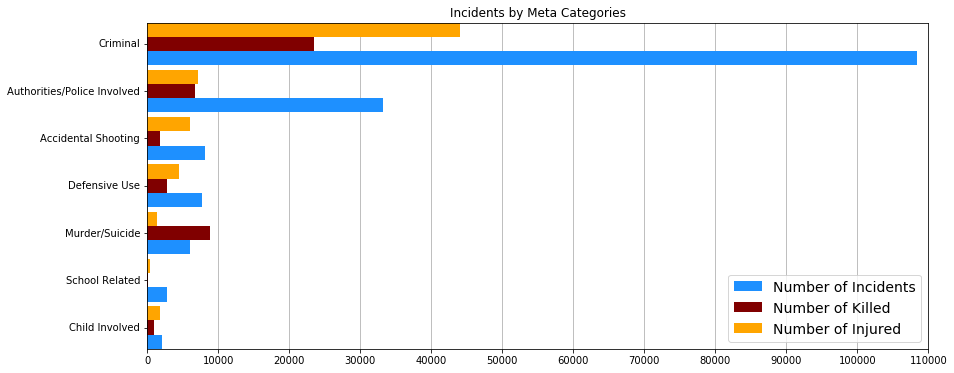

In [37]:
bar_width = 0.3
fig,ax = plt.subplots(figsize=(14,6))
n_inc = ax.barh(inc_by_meta.index, inc_by_meta['Number of Incidents'], bar_width, color='dodgerblue')
n_kil = ax.barh(inc_by_meta.index + bar_width, inc_by_meta['Number of Killed'], bar_width, color='maroon')
n_inj = ax.barh(inc_by_meta.index + 2 * bar_width, inc_by_meta['Number of Injured'], bar_width, color='orange')
ax.set_title('Incidents by Meta Categories')
ax.set_yticks(inc_by_meta.index + bar_width)
ax.set_yticklabels(inc_by_meta['Meta Category'], va='center')
ax.set_xticks([10000 * i for i in range(0,12)])
ax.set_xticklabels([10000 * i for i in range(0,12)])
ax.set_ylim(-0.15, 6.75)
ax.set_xlim(0, 110000)
ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.legend([n_inc, n_kil, n_inj],['Number of Incidents', 'Number of Killed', 'Number of Injured'], fontsize=14)
fig.savefig('output/Incidents by Meta Categories.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

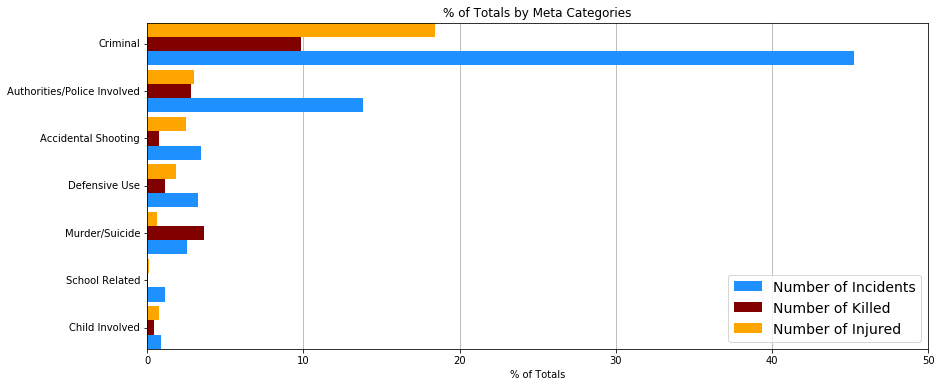

In [38]:
total_killed = clean_data['Number of Killed'].fillna(0).sum()
total_injured = clean_data['Number of Injured'].fillna(0).sum()
total_inc_number = len(clean_data.index)
inc_by_meta_prcnt = inc_by_meta.copy()

inc_by_meta_prcnt['Number of Incidents'] = inc_by_meta_prcnt['Number of Incidents'] / total_inc_number * 100.0
inc_by_meta_prcnt['Number of Killed'] = inc_by_meta_prcnt['Number of Killed'] / total_inc_number * 100.0
inc_by_meta_prcnt['Number of Injured'] = inc_by_meta_prcnt['Number of Injured'] / total_inc_number * 100.0

bar_width = 0.3
fig,ax = plt.subplots(figsize=(14,6))
n_inc = ax.barh(inc_by_meta_prcnt.index, inc_by_meta_prcnt['Number of Incidents'], bar_width, color='dodgerblue')
n_kil = ax.barh(inc_by_meta_prcnt.index + bar_width, inc_by_meta_prcnt['Number of Killed'], bar_width, color='maroon')
n_inj = ax.barh(inc_by_meta_prcnt.index + 2 * bar_width, inc_by_meta_prcnt['Number of Injured'], bar_width, color='orange')
ax.set_title('% of Totals by Meta Categories')
ax.set_xlabel('% of Totals')
ax.set_yticks(inc_by_meta_prcnt.index + bar_width)
ax.set_yticklabels(inc_by_meta_prcnt['Meta Category'], va='center')
ax.set_xticklabels([10 * i for i in range(0,6)])
ax.set_ylim(-0.15, 6.75)
ax.set_xlim(0, 50)
ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.legend([n_inc, n_kil, n_inj],['Number of Incidents', 'Number of Killed', 'Number of Injured'], fontsize=14)
fig.savefig('output/Incidents by Meta Categories (Percentage).png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

<a name="census"/>

### Census Population

#### Reading the census population data collected:

In [39]:
census_data = pd.read_csv('data/census_population.csv', low_memory=False)
census_data.head(2)

,State Name,2013,2014,2015,2016,2017,2018
0,Alabama,4799277,4817678,4830620,4841164,4850771,4864680
1,Alaska,720316,728300,733375,736855,738565,738516


#### Keeping only Year, State Name, Number of Killed, Number of Injured columns for analysis

In [40]:
clean_incident_data = clean_data.loc[:,['Year','State Name',
                                        'Number of Killed',
                                        'Number of Injured'    
]]
clean_incident_data.head(2)

,Year,State Name,Number of Killed,Number of Injured
0,2013,Pennsylvania,0,4
1,2013,California,1,3


#### Grouping data based on year:

In [41]:
killed_data = clean_incident_data["Number of Killed"].value_counts()
injured_data = clean_incident_data["Number of Injured"].value_counts()

grouped_year_df = clean_incident_data.groupby('Year')
count_years = grouped_year_df['Year'].count()

count_years

Year
2013      278
2014    51854
2015    53579
2016    58763
2017    61401
2018    13802
Name: Year, dtype: int64

#### Putting everything in a dataframe for easier analysis and visualizations:

In [42]:
year_counts = clean_incident_data["Year"].value_counts()
year_counts = year_counts.head()
year_counts = pd.DataFrame(year_counts)
year_counts = year_counts.reset_index()
year_counts = year_counts.rename(columns={'index':'Year', 'Year': 'Total Incidents'})
year_counts = year_counts.sort_values("Year")

year_counts.drop(year_counts.index[4], inplace=True)
year_counts.head()

,Year,Total Incidents
3,2014,51854
2,2015,53579
1,2016,58763
0,2017,61401


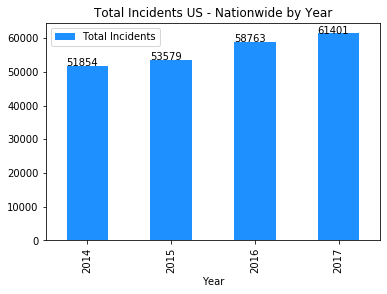

In [43]:
year_incidents = year_counts.set_index('Year', drop=True)
ax = year_incidents.plot.bar(title="Total Incidents US - Nationwide by Year", color="dodgerblue")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()), )
plt.savefig("output/total_nationwide_years.png")
plt.show()

In [44]:
grouped_year_df = clean_incident_data.groupby(['Year'])
grouped_year_df = grouped_year_df.sum().head(10)

grouped_year_df['Total Incidents'] = grouped_year_df['Number of Killed'] + grouped_year_df['Number of Injured']
grouped_year_df.head()

,Number of Killed,Number of Injured,Total Incidents
Year,,,
2013,317,979,1296
2014,12557,23002,35559
2015,13484,26967,40451
2016,15066,30580,45646
2017,15511,30703,46214


#### Adding a new column for Total Incidents:

In [45]:
clean_incident_data["Total Incidents"] = clean_incident_data["Number of Killed"] + clean_incident_data["Number of Injured"]

#### Total Incidents in 2013:

In [46]:
# Create DataFrame total incident by year 2013
group_2013 = clean_incident_data.loc[clean_incident_data["Year"] == 2013]
group_2013.head()
del group_2013['Number of Killed']
del group_2013['Number of Injured']
group_2013.head()
 
state_summary_2013 = group_2013.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2013')
state_summary_2013['Total Incidents 2013'].astype(int)
state_summary_2013.head()

,State Name,Total Incidents 2013
0,Alabama,2
1,Arizona,5
2,California,39
3,Colorado,3
4,Connecticut,3


#### Total Incidents in 2014:

In [47]:
group_2014 = clean_incident_data.loc[clean_incident_data["Year"] == 2014]
group_2014.head()
del group_2014['Number of Killed']
del group_2014['Number of Injured']
group_2014.head()
 
state_summary_2014 = group_2014.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2014')
state_summary_2014['Total Incidents 2014'].astype(int)
state_summary_2014.head()

,State Name,Total Incidents 2014
0,Alabama,1318
1,Alaska,146
2,Arizona,556
3,Arkansas,572
4,California,3732


#### Total Incidents in 2015:

In [48]:
group_2015 = clean_incident_data.loc[clean_incident_data["Year"] == 2015]
group_2015.head()
del group_2015['Number of Killed']
del group_2015['Number of Injured']
group_2015.head()
 
state_summary_2015 = group_2015.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2015')
state_summary_2015['Total Incidents 2015'].astype(int)
state_summary_2015.head()

,State Name,Total Incidents 2015
0,Alabama,1034
1,Alaska,380
2,Arizona,480
3,Arkansas,538
4,California,3234


#### Total Incidents in 2016:

In [49]:
group_2016 = clean_incident_data.loc[clean_incident_data["Year"] == 2016]
group_2016.head()
del group_2016['Number of Killed']
del group_2016['Number of Injured']
group_2016.head()
 
state_summary_2016 = group_2016.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2016')
state_summary_2016['Total Incidents 2016'].astype(int)
state_summary_2016.head()

,State Name,Total Incidents 2016
0,Alabama,1309
1,Alaska,445
2,Arizona,554
3,Arkansas,720
4,California,3617


#### Total Incidents in 2017:

In [50]:
group_2017 = clean_incident_data.loc[clean_incident_data["Year"] == 2017]
group_2017.head()
del group_2017['Number of Killed']
del group_2017['Number of Injured']
group_2017.head()
 
state_summary_2017 = group_2017.groupby(
        by=['State Name']
    )['Total Incidents'].count().reset_index(name='Total Incidents 2017')
state_summary_2017['Total Incidents 2017'].astype(int)
state_summary_2017.head()

,State Name,Total Incidents 2017
0,Alabama,1461
1,Alaska,317
2,Arizona,587
3,Arkansas,820
4,California,4588


#### Combining Data for all the years

In [51]:
combined_state_year = pd.merge(state_summary_2013, state_summary_2014, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , state_summary_2015, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , state_summary_2016, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , state_summary_2017, how='outer', on='State Name')
combined_state_year = pd.merge(combined_state_year , census_data, how='outer', on='State Name')
combined_state_year = combined_state_year.rename(columns={"2013":"Population 2013","2014":"Population 2014",
                                                          "2015":"Population 2015", "2016":"Population 2016", 
                                                          "2017": "Population 2017"})

combined_state_year.fillna(0, inplace=True)

del combined_state_year['Total Incidents 2013']
del combined_state_year['Population 2013']
combined_state_year.head(2)

,State Name,Total Incidents 2014,Total Incidents 2015,Total Incidents 2016,Total Incidents 2017,Population 2014,Population 2015,Population 2016,Population 2017,2018
0,Alabama,1318.0,1034.0,1309.0,1461.0,4817678,4830620,4841164,4850771,4864680
1,Arizona,556.0,480.0,554.0,587.0,6561516,6641928,6728577,6809946,6946685


In [52]:
new_combined_state_year = combined_state_year

#### Incidents per Capita Calculations:

In [53]:
combined_state_year['Incidents 2014 per Capita'] = (combined_state_year['Total Incidents 2014'] / combined_state_year['Population 2014'] * 10000)
combined_state_year['Incidents 2015 per Capita'] = (combined_state_year['Total Incidents 2015'] / combined_state_year['Population 2015'] * 10000)
combined_state_year['Incidents 2016 per Capita'] = (combined_state_year['Total Incidents 2016'] / combined_state_year['Population 2016'] * 10000)
combined_state_year['Incidents 2017 per Capita'] = (combined_state_year['Total Incidents 2017'] / combined_state_year['Population 2017'] * 10000)
combined_state_year 
combined_state_year['Incidents 2017 per Capita'] = combined_state_year['Incidents 2017 per Capita'].apply(round)
combined_state_year['Incidents 2016 per Capita'] = combined_state_year['Incidents 2016 per Capita'].apply(round)
combined_state_year['Incidents 2015 per Capita'] = combined_state_year['Incidents 2015 per Capita'].apply(round)
combined_state_year['Incidents 2014 per Capita'] = combined_state_year['Incidents 2014 per Capita'].apply(round)
combined_state_year.head(2)

,State Name,Total Incidents 2014,Total Incidents 2015,Total Incidents 2016,Total Incidents 2017,Population 2014,Population 2015,Population 2016,Population 2017,2018,Incidents 2014 per Capita,Incidents 2015 per Capita,Incidents 2016 per Capita,Incidents 2017 per Capita
0,Alabama,1318.0,1034.0,1309.0,1461.0,4817678,4830620,4841164,4850771,4864680,3,2,3,3
1,Arizona,556.0,480.0,554.0,587.0,6561516,6641928,6728577,6809946,6946685,1,1,1,1


#### Keeping only Incidents per Capita:

In [54]:
top_5_2014 = combined_state_year[["State Name","Incidents 2014 per Capita"]]
top_5_2014 = top_5_2014.sort_values('Incidents 2014 per Capita',ascending=False)
top_5_2015 = combined_state_year[["State Name","Incidents 2015 per Capita"]]
top_5_2015 = top_5_2015.sort_values('Incidents 2015 per Capita',ascending=False)
top_5_2016 = combined_state_year[["State Name","Incidents 2016 per Capita"]]
top_5_2016 = top_5_2016.sort_values('Incidents 2016 per Capita',ascending=False)
top_5_2017 = combined_state_year[["State Name","Incidents 2017 per Capita"]]
top_5_2017 = top_5_2017.sort_values('Incidents 2017 per Capita',ascending=False)

combined_top_5 = pd.merge(top_5_2014 , top_5_2015, how='outer', on='State Name')
combined_top_5 = pd.merge(combined_top_5 , top_5_2016, how='outer', on='State Name')
combined_top_5 = pd.merge(combined_top_5 , top_5_2017, how='outer', on='State Name')
combined_top_5.head(2)

,State Name,Incidents 2014 per Capita,Incidents 2015 per Capita,Incidents 2016 per Capita,Incidents 2017 per Capita
0,District of Columbia,13,8,8,17
1,Delaware,5,4,4,4


#### Looking at Incidents per Capita for 2014:

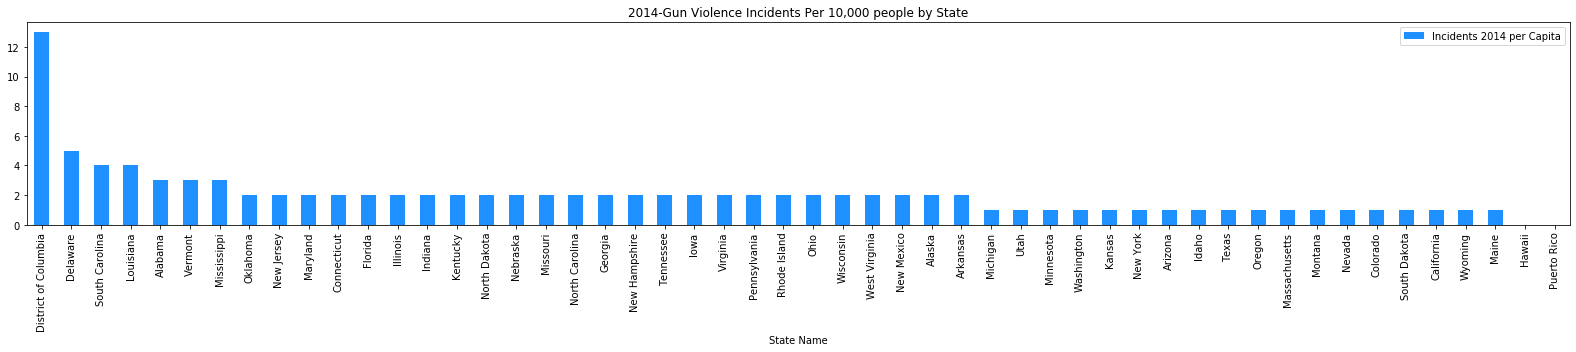

In [55]:
state_capita_2014 = combined_top_5[["State Name","Incidents 2014 per Capita"]]
state_capita_2014 = state_capita_2014.sort_values('Incidents 2014 per Capita',ascending=False)

x_axis = np.arange(len(state_capita_2014))
tick_locations = [value+0.1 for value in x_axis]
# Set the index to be "State" so they will be used as labels
state_capita_2014 = state_capita_2014.set_index("State Name")
state_capita_2014.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_capita_2014.plot(kind="bar", figsize=(22,5), color='dodgerblue')
# Set a title for the chart
plt.title("2014-Gun Violence Incidents Per 10,000 people by State")
plt.tight_layout()
plt.savefig("output/2014-Total Incident 10k.png")
plt.show()

#### Looking at Incidents per Capita for 2015:

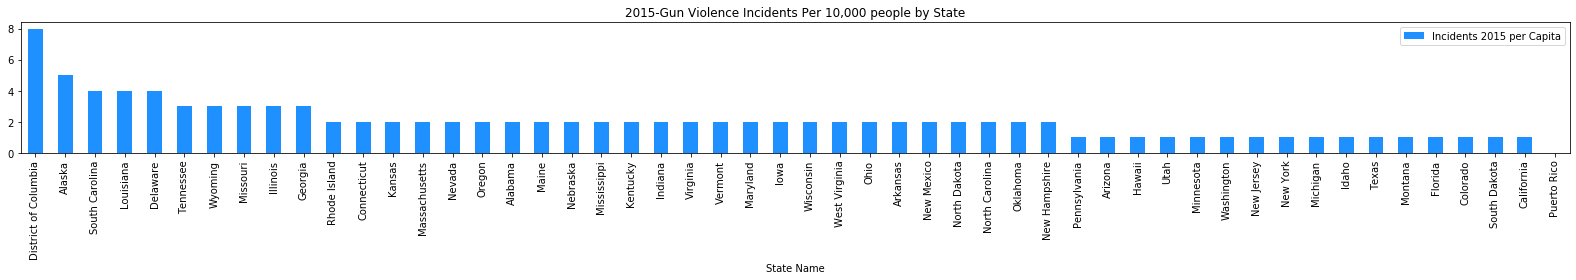

In [56]:
state_capita_2015 = combined_top_5[["State Name","Incidents 2015 per Capita"]]
state_capita_2015 = state_capita_2015.sort_values('Incidents 2015 per Capita',ascending=False)
state_capita_2015.head()

# Set the index to be "State" so they will be used as labels
state_capita_2015 = state_capita_2015.set_index("State Name")

state_capita_2015.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_capita_2015.plot(kind="bar", figsize=(22,4), color="dodgerblue")

# Set a title for the chart
plt.title("2015-Gun Violence Incidents Per 10,000 people by State")
plt.tight_layout()
plt.savefig("output/2015-Total Incident 10k.png")
plt.show()

#### Looking at Incidents per Capita for 2016:

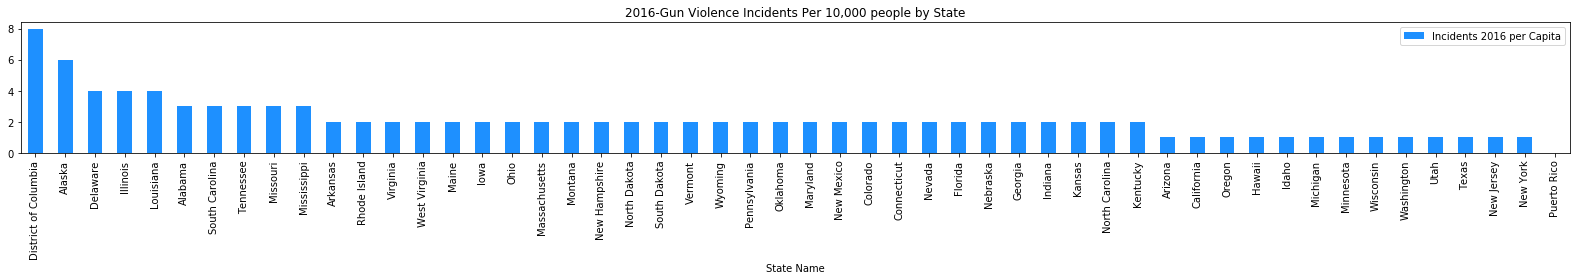

In [57]:
state_capita_2016 = combined_state_year[["State Name","Incidents 2016 per Capita"]]
state_capita_2016 = state_capita_2016.sort_values('Incidents 2016 per Capita',ascending=False)
 
# Set the index to be "State" so they will be used as labels
state_capita_2016 = state_capita_2016.set_index("State Name")

state_capita_2016.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_capita_2016.plot(kind="bar", figsize=(22,4), color='dodgerblue')

# Set a title for the chart
plt.title("2016-Gun Violence Incidents Per 10,000 people by State")
plt.tight_layout()
plt.savefig("output/2016-Total Incident 10k.png")
plt.show()

#### Looking at Incidents per Capita for 2017:

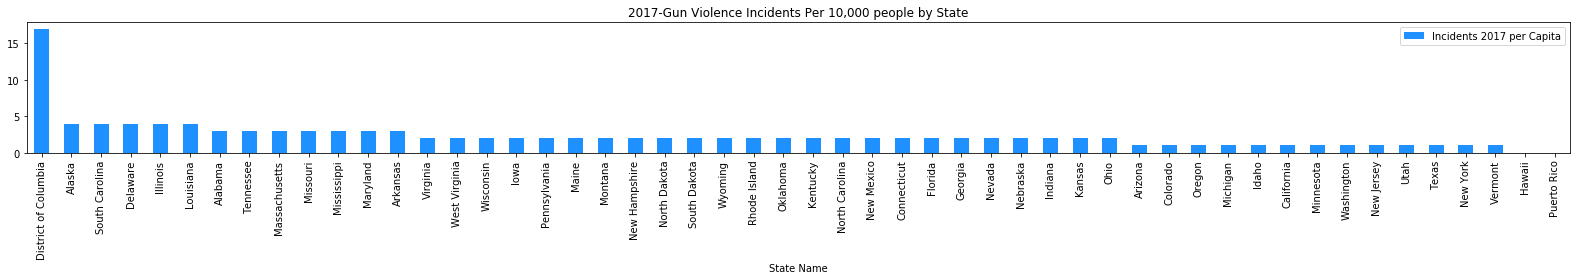

In [58]:
state_capita_2017 = combined_state_year[["State Name","Incidents 2017 per Capita"]]
state_capita_2017 = state_capita_2017.sort_values('Incidents 2017 per Capita',ascending=False)
 
# Set the index to be "State" so they will be used as labels
state_capita_2017 = state_capita_2017.set_index("State Name")

state_capita_2017.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_capita_2017.plot(kind="bar", figsize=(22,4), color='dodgerblue')

# Set a title for the chart
plt.title("2017-Gun Violence Incidents Per 10,000 people by State")
plt.tight_layout()
plt.savefig("output/2017-Total Incident 10k.png")
plt.show()

#### Summing all incidents:

In [59]:
grouped_year_df = clean_incident_data.groupby(['Year'])
grouped_year_df = grouped_year_df.sum().head(10)
grouped_year_df['Total Incidents'] = grouped_year_df['Number of Killed'] + grouped_year_df['Number of Injured']
grouped_year_df.head()

,Number of Killed,Number of Injured,Total Incidents
Year,,,
2013,317,979,1296
2014,12557,23002,35559
2015,13484,26967,40451
2016,15066,30580,45646
2017,15511,30703,46214


<a name="political"/>

# Political Party Related Analysis & Findings

#### Reading the political party affliation related data collected for each state:

In [60]:
political_party = pd.read_csv('data/political_party_affiliation.csv', low_memory=False)
political_party.head(2)

,State Name,2012,2013,2014,2015,2016,2017,2018
0,Alabama,Republican,Republican,Republican,Republican,Republican,Republican,Republican
1,Alaska,Republican,Republican,Republican,Republican,Republican,Republican,Republican


#### Combining with Total Incidents for each year:

In [61]:
political_party_2014 = pd.merge(combined_state_year, political_party, how='outer', on='State Name')
political_party_2014 = political_party_2014[['State Name', 'Total Incidents 2014', '2014']]
political_party_2014.head(2)

political_party_2015 = pd.merge(combined_state_year, political_party, how='outer', on='State Name')
political_party_2015 = political_party_2015[['State Name', 'Total Incidents 2015', '2015']]
political_party_2015.head(2)

political_party_2016 = pd.merge(combined_state_year, political_party, how='outer', on='State Name')
political_party_2016 = political_party_2016[['State Name', 'Total Incidents 2016', '2016']]
political_party_2016.head(2)

political_party_2017 = pd.merge(combined_state_year, political_party, how='outer', on='State Name')
political_party_2017 = political_party_2017[['State Name', 'Total Incidents 2017', '2017']]
political_party_2017.head(2)

party_1 = pd.merge(political_party_2014, political_party_2015, how='outer', on='State Name')
party_2 = pd.merge(party_1, political_party_2016, how='outer', on='State Name')
party_combined = pd.merge(party_2, political_party_2017, how='outer', on='State Name')
party_combined.head(2)

,State Name,Total Incidents 2014,2014,Total Incidents 2015,2015,Total Incidents 2016,2016,Total Incidents 2017,2017
0,Alabama,1318.0,Republican,1034.0,Republican,1309.0,Republican,1461.0,Republican
1,Arizona,556.0,Republican,480.0,Republican,554.0,Republican,587.0,Republican


#### Puerto Rico doesn't have US political party data, so filling that with 0.

In [62]:
party_combined.columns

Index(['State Name', 'Total Incidents 2014', '2014', 'Total Incidents 2015',
       '2015', 'Total Incidents 2016', '2016', 'Total Incidents 2017', '2017'],
      dtype='object')

#### One Hot Encoding for Categorical Data:

In [63]:
one_hot_2014 = pd.get_dummies(party_combined['2014'], prefix='2014_')
party_combined = party_combined.drop('2014', axis=1)
party_combined = party_combined.join(one_hot_2014)

one_hot_2015 = pd.get_dummies(party_combined['2015'], prefix='2015_')
party_combined = party_combined.drop('2015', axis=1)
party_combined = party_combined.join(one_hot_2015)

one_hot_2016 = pd.get_dummies(party_combined['2016'], prefix='2016_')
party_combined = party_combined.drop('2016', axis=1)
party_combined = party_combined.join(one_hot_2016)

one_hot_2017 = pd.get_dummies(party_combined['2017'], prefix='2017_')
party_combined = party_combined.drop('2017', axis=1)
party_combined = party_combined.join(one_hot_2017)

In [64]:
party_combined['Total Incidents'] = party_combined['Total Incidents 2014'] + party_combined['Total Incidents 2015'] + party_combined['Total Incidents 2016'] + party_combined['Total Incidents 2017']
party_combined = party_combined.drop(['Total Incidents 2014', 'Total Incidents 2015', 'Total Incidents 2016', 'Total Incidents 2017'], axis=1)
party_combined.head(2)

,State Name,2014__Democrat,2014__Republican,2015__Democrat,2015__Republican,2016__Democrat,2016__Republican,2017__Democrat,2017__Republican,Total Incidents
0,Alabama,0,1,0,1,0,1,0,1,5122.0
1,Arizona,0,1,0,1,0,1,0,1,2177.0


In [65]:
party_combined.shape

(52, 10)

#### Building a correlation matrix to see if political party and number of incidents have any correlation:

In [66]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

party_combined.corr(method=histogram_intersection)

,2014__Democrat,2014__Republican,2015__Democrat,2015__Republican,2016__Democrat,2016__Republican,2017__Democrat,2017__Republican,Total Incidents
2014__Democrat,1.0,0.0,27.0,0.0,21.0,6.0,21.0,6.0,27.0
2014__Republican,0.0,1.0,0.0,24.0,0.0,24.0,0.0,24.0,24.0
2015__Democrat,27.0,0.0,1.0,0.0,21.0,6.0,21.0,6.0,27.0
2015__Republican,0.0,24.0,0.0,1.0,0.0,24.0,0.0,24.0,24.0
2016__Democrat,21.0,0.0,21.0,0.0,1.0,0.0,21.0,0.0,21.0
2016__Republican,6.0,24.0,6.0,24.0,0.0,1.0,0.0,30.0,30.0
2017__Democrat,21.0,0.0,21.0,0.0,21.0,0.0,1.0,0.0,21.0
2017__Republican,6.0,24.0,6.0,24.0,0.0,30.0,0.0,1.0,30.0
Total Incidents,27.0,24.0,27.0,24.0,21.0,30.0,21.0,30.0,1.0


#### Applying linear regression to see if political party affiliation has a significant impact on the total number of incidents:

In [67]:
party_combined2 = party_combined.drop(['State Name'], axis=1)
party_combined2.head(2)

,2014__Democrat,2014__Republican,2015__Democrat,2015__Republican,2016__Democrat,2016__Republican,2017__Democrat,2017__Republican,Total Incidents
0,0,1,0,1,0,1,0,1,5122.0
1,0,1,0,1,0,1,0,1,2177.0


In [68]:
party_combined2.shape

(52, 9)

In [69]:
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

X = party_combined2.iloc[:,0:7]
Y = party_combined2.iloc[:,8]
# print(X.shape)
# print(Y.shape)
model = LinearRegression().fit(X, Y)

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Total Incidents   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.720
Date:                Tue, 15 Dec 2020   Prob (F-statistic):              0.175
Time:                        10:56:56   Log-Likelihood:                -502.41
No. Observations:                  52   AIC:                             1013.
Df Residuals:                      48   BIC:                             1021.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.426e-13   3955.096  

**Political Party Affiliation does not seem to have a significant effect on the number of incidents per capita.**

<a name="gun-laws"/>

# Gun Laws Related Analysis & Findings

#### Reading the gun laws related data collected for each state:

In [70]:
gun_laws = pd.read_csv('data/gun_laws.csv', low_memory=False)
gun_laws = gun_laws.fillna('N/A')
gun_laws.head()

,State Name,Stars,Permit Required,Purchase Permit Required,Registration of firearm,Open Carry Allowed,Background Checks on Private Gun Sales Required,Magazine Size Restriction,State Preemption,Assault Weapons banned,Red Flag Law,Owner License Required
0,Alabama,4,Yes,No,No,Yes,No,N/A,N/A,N/A,N/A,N/A
1,Alaska,5,No,No,No,Yes,No,N/A,N/A,N/A,N/A,N/A
2,Arizona,5,No,No,No,Yes,No,No,N/A,N/A,N/A,N/A
3,Arkansas,3,No,No,No,Yes,No,No,N/A,N/A,N/A,N/A
4,California,1,Yes,Yes,Yes,Yes,Yes,Yes,N/A,N/A,N/A,N/A


#### Dropping some columns since some of the gun laws are applicable only to very few states:

In [71]:
gun_laws = gun_laws.drop(['Magazine Size Restriction', 'State Preemption', 'Assault Weapons banned', 'Red Flag Law', 'Owner License Required'], axis=1)
gun_laws.head(2)

,State Name,Stars,Permit Required,Purchase Permit Required,Registration of firearm,Open Carry Allowed,Background Checks on Private Gun Sales Required
0,Alabama,4,Yes,No,No,Yes,No
1,Alaska,5,No,No,No,Yes,No


<a name="permit"/>

### Permits Required:

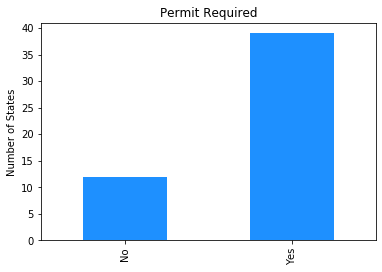

Yes    39
No     12
Name: Permit Required, dtype: int64

In [72]:
gun_laws['Permit Required'].value_counts().sort_index().plot(kind='bar', title='Permit Required', color = 'dodgerblue')
plt.ylabel('Number of States')
plt.show()
gun_laws['Permit Required'].value_counts()

<a name="purchase-permit"/>

### Purchase Permits Required:

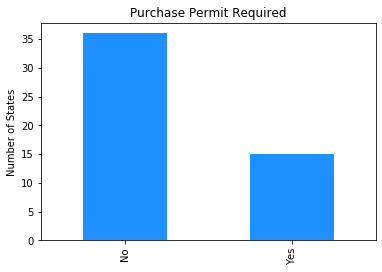

No     36
Yes    15
Name: Purchase Permit Required, dtype: int64

In [73]:
gun_laws['Purchase Permit Required'].value_counts().sort_index().plot(kind='bar', title='Purchase Permit Required', color = 'dodgerblue')
plt.ylabel('Number of States')
plt.show()
gun_laws['Purchase Permit Required'].value_counts()

<a name="registration"/>

### Registration of firearms:

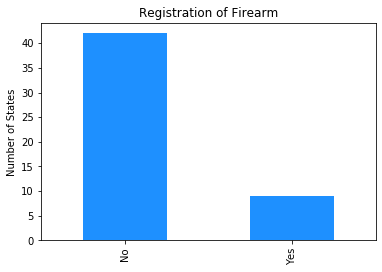

In [74]:
gun_laws['Registration of firearm'].value_counts().sort_index().plot(kind='bar', title='Registration of Firearm', 
                                                        color = 'dodgerblue')
plt.ylabel('Number of States')
plt.show()

<a name="open-carry"/>

### Open Carry:

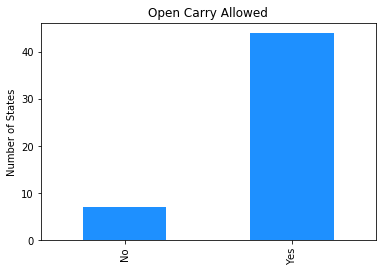

No     42
Yes     9
Name: Registration of firearm, dtype: int64

In [75]:
gun_laws['Open Carry Allowed'].value_counts().sort_index().plot(kind='bar', title='Open Carry Allowed', color = 'dodgerblue')
plt.ylabel('Number of States')
plt.show()
gun_laws['Registration of firearm'].value_counts().sort_index()

<a name="background"/>

### Background Checks on Private Gun Sales Required:

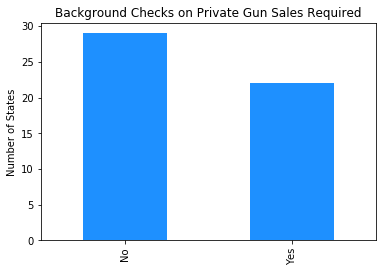

No     29
Yes    22
Name: Background Checks on Private Gun Sales Required, dtype: int64

In [76]:
gun_laws['Background Checks on Private Gun Sales Required'].value_counts().sort_index().plot(kind='bar', 
                                                                                title='Background Checks on Private Gun Sales Required', 
                                                                                color = 'dodgerblue')
plt.ylabel('Number of States')
plt.show()
gun_laws['Background Checks on Private Gun Sales Required'].value_counts()

#### Combining Incident Counts per State:

In [77]:
incident_count = clean_incident_data['State Name'].value_counts()

state_incident_count = pd.DataFrame(incident_count.reset_index())
state_incident_count.columns = ['State Name', 'Incident Count']
state_incident_count.head()

,State Name,Incident Count
0,Illinois,17556
1,California,16306
2,Florida,15029
3,Texas,13577
4,Ohio,10244


#### Combining Incident Counts per Capita for all states:

In [78]:
combined_top_5.head()
combined_top_5['Total Incidents per Capita'] = combined_top_5['Incidents 2014 per Capita'] + combined_top_5['Incidents 2015 per Capita'] + combined_top_5['Incidents 2016 per Capita'] + combined_top_5['Incidents 2017 per Capita']            
combined_top_5
incidents_per_capita = combined_top_5[['State Name', 'Total Incidents per Capita']]
incidents_per_capita.head()

,State Name,Total Incidents per Capita
0,District of Columbia,46
1,Delaware,17
2,South Carolina,15
3,Louisiana,16
4,Alabama,11


In [79]:
# merge gun law data with state incident data

law_data_1 = pd.merge(gun_laws, state_incident_count, how='left', on='State Name')
law_data = pd.merge(law_data_1, incidents_per_capita, how='outer', on='State Name')
law_data.head()

,State Name,Stars,Permit Required,Purchase Permit Required,Registration of firearm,Open Carry Allowed,Background Checks on Private Gun Sales Required,Incident Count,Total Incidents per Capita
0,Alabama,4.0,Yes,No,No,Yes,No,5471.0,11
1,Alaska,5.0,No,No,No,Yes,No,1349.0,17
2,Arizona,5.0,No,No,No,Yes,No,2328.0,4
3,Arkansas,3.0,No,No,No,Yes,No,2842.0,9
4,California,1.0,Yes,Yes,Yes,Yes,Yes,16306.0,4


**Stars Refers to how gun friendly a state is. 5 stars = Most Gun Friendly State**

#### Adding one hot encoding for categorical data:

In [80]:
one_hot_permit = pd.get_dummies(law_data['Permit Required'], prefix='Permit_')
law_data = law_data.drop('Permit Required', axis=1)
law_data = law_data.join(one_hot_permit)

one_hot_purchase = pd.get_dummies(law_data['Purchase Permit Required'], prefix='Purchase_')
law_data = law_data.drop('Purchase Permit Required', axis=1)
law_data = law_data.join(one_hot_purchase)

one_hot_registration = pd.get_dummies(law_data['Registration of firearm'], prefix='Registration_')
law_data = law_data.drop('Registration of firearm', axis=1)
law_data = law_data.join(one_hot_registration)

one_hot_open = pd.get_dummies(law_data['Open Carry Allowed'], prefix='OpenCarry_')
law_data = law_data.drop('Open Carry Allowed', axis=1)
law_data = law_data.join(one_hot_open)

one_hot_background = pd.get_dummies(law_data['Background Checks on Private Gun Sales Required'], prefix='BackgroundCheck_')
law_data = law_data.drop('Background Checks on Private Gun Sales Required', axis=1)
law_data = law_data.join(one_hot_background)

In [81]:
law_data.head(2)

,State Name,Stars,Incident Count,Total Incidents per Capita,Permit__No,Permit__Yes,Purchase__No,Purchase__Yes,Registration__No,Registration__Yes,OpenCarry__No,OpenCarry__Yes,BackgroundCheck__No,BackgroundCheck__Yes
0,Alabama,4.0,5471.0,11,0,1,1,0,1,0,0,1,1,0
1,Alaska,5.0,1349.0,17,1,0,1,0,1,0,0,1,1,0


#### Plotting Incidents per Capita with star:

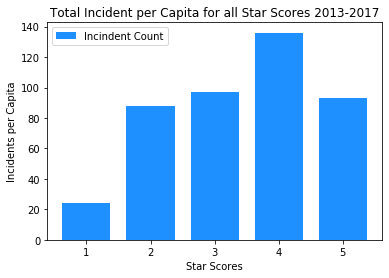

In [82]:
one_star_incident_count = 0
two_star_incident_count = 0
three_star_incident_count = 0
four_star_incident_count = 0
five_star_incident_count = 0

for _,row in law_data.iterrows():
        if row['Stars']== 1:
            one_star_incident_count = one_star_incident_count + row['Total Incidents per Capita']
        if row['Stars']== 2:
            two_star_incident_count = two_star_incident_count + row['Total Incidents per Capita']
        if row['Stars']== 3:
            three_star_incident_count = three_star_incident_count + row['Total Incidents per Capita']
        if row['Stars']== 4:
            four_star_incident_count = four_star_incident_count + row['Total Incidents per Capita']
        if row['Stars']== 5:
            five_star_incident_count = five_star_incident_count + row['Total Incidents per Capita']
x_star_axis = 5       
y_incident_total = [one_star_incident_count,
                    two_star_incident_count,
                    three_star_incident_count,
                    four_star_incident_count,
                    five_star_incident_count]
fig, ax = plt.subplots()
index = np.arange(x_star_axis)
bar_width = .75
opacity = 1
star_bar = ax.bar(index,y_incident_total, bar_width, alpha=opacity,color='dodgerblue',label='Incindent Count')
ax.set_xlabel('Star Scores')
ax.set_ylabel('Incidents per Capita')
ax.set_title('Total Incident per Capita for all Star Scores 2013-2017')
ax.set_xticks(index)
ax.set_xticklabels(('1', '2', '3', '4', '5'))
ax.legend()
plt.show()

<a name="corr"/>

### Correlation Matrix:

#### Building a correlation matrix to see if gun laws and number of incidents have any correlation:

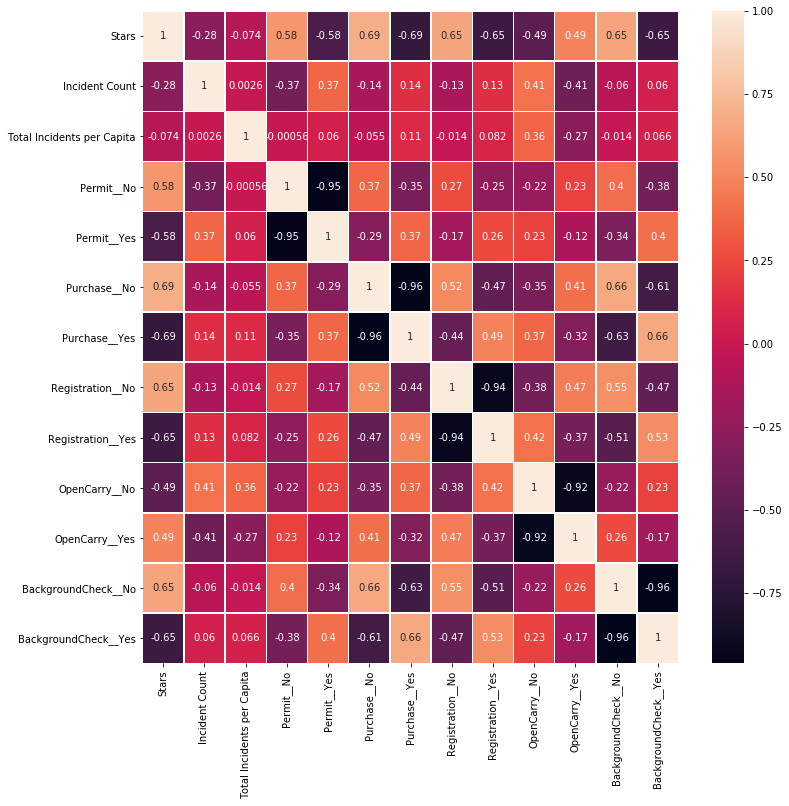

In [83]:
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(law_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.savefig('output/correlation_matrix.png')
plt.show()

In [84]:
law_data.corr()

,Stars,Incident Count,Total Incidents per Capita,Permit__No,Permit__Yes,Purchase__No,Purchase__Yes,Registration__No,Registration__Yes,OpenCarry__No,OpenCarry__Yes,BackgroundCheck__No,BackgroundCheck__Yes
Stars,1.000000,-0.283295,-0.074499,0.577238,-0.577238,0.687929,-0.687929,0.654787,-0.654787,-0.490976,0.490976,0.647000,-0.647000
Incident Count,-0.283295,1.000000,0.002566,-0.371594,0.371594,-0.138445,0.138445,-0.134370,0.134370,0.414651,-0.414651,-0.059750,0.059750
Total Incidents per Capita,-0.074499,0.002566,1.000000,-0.000558,0.059996,-0.054505,0.112350,-0.013720,0.082342,0.358532,-0.267814,-0.013964,0.066146
Permit__No,0.577238,-0.371594,-0.000558,1.000000,-0.948683,0.365148,-0.348743,0.267261,-0.250581,-0.216025,0.233550,0.395881,-0.376655
Permit__Yes,-0.577238,0.371594,0.059996,-0.948683,1.000000,-0.288675,0.367607,-0.169031,0.264135,0.227710,-0.123091,-0.335326,0.404520
Purchase__No,0.687929,-0.138445,-0.054505,0.365148,-0.288675,1.000000,-0.955072,0.520480,-0.465968,-0.347452,0.408635,0.664696,-0.609824
Purchase__Yes,-0.687929,0.138445,0.112350,-0.348743,0.367607,-0.955072,1.000000,-0.443244,0.494121,0.370706,-0.316745,-0.629491,0.657604
Registration__No,0.654787,-0.134370,-0.013720,0.267261,-0.169031,0.520480,-0.443244,1.000000,-0.937587,-0.379402,0.468141,0.547912,-0.471037
Registration__Yes,-0.654787,0.134370,0.082342,-0.250581,0.264135,-0.465968,0.494121,-0.937587,1.000000,0.415296,-0.368478,-0.513715,0.534240
OpenCarry__No,-0.490976,0.414651,0.358532,-0.216025,0.227710,-0.347452,0.370706,-0.379402,0.415296,1.000000,-0.924962,-0.215982,0.232476


**States with Open Carry Permitted see a slightly lower incident rate per capita.**

**States with Open Carry not Permitted see a slightly higher incident rate per capita.**

In [85]:
law_data_copy = law_data

law_data_copy = law_data_copy.drop(['State Name'], axis=1)
law_data_copy.head(2)

,Stars,Incident Count,Total Incidents per Capita,Permit__No,Permit__Yes,Purchase__No,Purchase__Yes,Registration__No,Registration__Yes,OpenCarry__No,OpenCarry__Yes,BackgroundCheck__No,BackgroundCheck__Yes
0,4.0,5471.0,11,0,1,1,0,1,0,0,1,1,0
1,5.0,1349.0,17,1,0,1,0,1,0,0,1,1,0


In [86]:
law_data_copy = law_data_copy[['Total Incidents per Capita', 'Stars', 'Permit__Yes', 'Purchase__No', 'Purchase__Yes', 'Purchase__No', 'Registration__Yes', 'Registration__No', 'OpenCarry__Yes', 'OpenCarry__No', 'BackgroundCheck__Yes', 'BackgroundCheck__No']]
law_data_copy = law_data_copy[:-1]
law_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total Incidents per Capita  51 non-null     int64  
 1   Stars                       51 non-null     float64
 2   Permit__Yes                 51 non-null     uint8  
 3   Purchase__No                51 non-null     uint8  
 4   Purchase__Yes               51 non-null     uint8  
 5   Purchase__No                51 non-null     uint8  
 6   Registration__Yes           51 non-null     uint8  
 7   Registration__No            51 non-null     uint8  
 8   OpenCarry__Yes              51 non-null     uint8  
 9   OpenCarry__No               51 non-null     uint8  
 10  BackgroundCheck__Yes        51 non-null     uint8  
 11  BackgroundCheck__No         51 non-null     uint8  
dtypes: float64(1), int64(1), uint8(10)
memory usage: 1.7 KB


<a name="linear"/>

### Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

X = law_data_copy.iloc[:,1:11]
Y = law_data_copy.iloc[:,0]
model = LinearRegression().fit(X, Y)

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     Total Incidents per Capita   R-squared:                       0.143
Model:                                    OLS   Adj. R-squared:                  0.026
Method:                         Least Squares   F-statistic:                     1.225
Date:                        Tue, 15 Dec 2020   Prob (F-statistic):              0.312
Time:                                10:56:58   Log-Likelihood:                -161.81
No. Observations:                          51   AIC:                             337.6
Df Residuals:                              44   BIC:                             351.1
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**States with Open Carry not allowed do have a significant effect on the number of incidents per capita.**

<a name="strict"/>

### Strict vs Lax Gun Laws

#### Creating groups for each star value:

In [88]:
star_1 = law_data[law_data['Stars'] == 1]
star_2 = law_data[law_data['Stars'] == 2]
star_3 = law_data[law_data['Stars'] == 3]
star_4 = law_data[law_data['Stars'] == 4]
star_5 = law_data[law_data['Stars'] == 5]

#### Star = 1 corresponds to states with the strictest gun laws

In [89]:
star_1 = star_1[['State Name', 'Total Incidents per Capita']]

In [90]:
star_2

,State Name,Stars,Incident Count,Total Incidents per Capita,Permit__No,Permit__Yes,Purchase__No,Purchase__Yes,Registration__No,Registration__Yes,OpenCarry__No,OpenCarry__Yes,BackgroundCheck__No,BackgroundCheck__Yes
7,Delaware,2.0,1685.0,17,0,1,1,0,1,0,0,1,0,1
8,District of Columbia,2.0,3195.0,46,0,1,0,1,0,1,1,0,0,1
13,Illinois,2.0,17556.0,13,0,1,0,1,1,0,1,0,0,1
21,Massachusetts,2.0,5981.0,8,0,1,0,1,1,0,0,1,0,1
23,Minnesota,2.0,2408.0,4,0,1,0,1,1,0,0,1,1,0


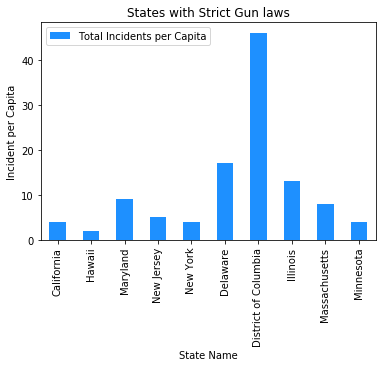

In [91]:
strict = law_data[law_data['Stars'] == 1] 
strict = strict.append(law_data[law_data['Stars'] == 2])
strict = strict[['State Name', 'Total Incidents per Capita']]

strict = strict.set_index("State Name")
strict.plot(kind='bar', color='dodgerblue')
plt.title('States with Strict Gun laws')
plt.ylabel('Incident per Capita')
plt.show()

**While there are fewer states with strict gun laws, the incident per capita rate is still very high for these states.**

#### Star = 5 corresponds to states with the most gun friendly laws.

In [92]:
star_5 = star_5[['State Name', 'Total Incidents per Capita']]

lax = law_data[law_data['Stars'] == 4] 
lax.append(law_data[law_data['Stars'] == 5])
lax = lax[['State Name', 'Total Incidents per Capita']]

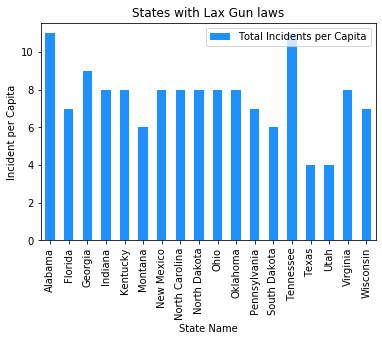

In [93]:
lax = lax.set_index("State Name")
lax.plot(kind='bar', color='dodgerblue')
plt.title('States with Lax Gun laws')
plt.ylabel('Incident per Capita')
plt.show()

**There are definitely more states with lax gun laws. These states do have a high incident per capita rate, with states like Alabama and Tennessee among the highest.**

<a name="conclusion"/>

# Conclusion

While most gun related incidents involve adults (18+), a shockingly large number of incidents (over 25K) involve teens. 

Looking at gun violence suspects, we can see that California, Texas, Florida, New York, Ohio and North Carolina have the highest suspects involved in shootings. However, Illinois has the highest number of victims reported, along with California, Texas, Florida and Ohio.

The top 10 dangerous cities include: Chicago, Baltimore, Washington DC, New Orleans, Philadelphia, Saint Louis, Milwaukee, Houston, Memphis and Jackonsville.

Most incidents that resulted in a high fatality involved cases of suicide, domestic violence, officers involved in the shooting, murder/suicide, armed robbery, and drug involvement.

We can also see that the number of incidents over years have been rising at an alarming rate, with 2017 having over 6000 such incidents. District of Columbia and Alaska have the highest number of such incidents every year.

Looking at the political party affiliations of each state from 2013-2017, we can see that they do not have a significant impact on the number of incidents that occur every year.

Most states require a permit to carry firearms, and open carry is allowed in 42 states. However, most states do not require firearms to be registered, and do not require a permit to purchase firearms. Background checks is not required in over half the states. Looking at the relationship between these different gun laws and the total number of incidents, we see that states that allow open carry see a slightly lower incident rate per capita. States with open carry not allowed do have a significant effect on the number of incidents per capita.
There are also a higher number of states with lax gun laws, compared to states with strict gun laws. However, in states like Delaware and District of Columbia, which have strict gun laws, we see a high incident rate per capita. 
States like Alabama and Tennessee, which have lax strict laws see a higher incident rate per capita compared to other states with lax gun laws.


<a name="limitations"/>

# Limitations

- The data available is for a short period, only from 2013 - 2017.
- Political Affiliation of the state does not reflect the political affiliation of the suspects involved. This could significantly impact results.
- Gun laws also differ for the types of guns involved. For the purpose of this analysis, gun laws pertaining to only handguns was considered. For long guns/rifles, data has not been added.

<a name="future"/>

# Future Work

Analysis on the impact of different gun types can be done, as well as compiling data for gun laws pertaining to different types of guns.
Data for the latest years can also be appended to make the analysis and findings more up to date.